In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import os
import warnings
warnings.filterwarnings('ignore')

# Download NLTK resources
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

# Set plot style
plt.style.use('ggplot')
sns.set_palette('Set2')


In [2]:
# Load the cleaned datasets
# Adjust the paths to where your cleaned data is stored
base_path = os.path.join(os.path.dirname(os.getcwd()), "data", "cleaned_data")
cleaned_reviews_df = pd.read_csv(os.path.join(base_path, 'cleaned_reviews.csv'))
cleaned_business_df = pd.read_csv(os.path.join(base_path, 'cleaned_businesses.csv'))
cleaned_users_df = pd.read_csv(os.path.join(base_path, 'cleaned_users.csv'))

# Convert date to datetime if it exists
if 'date' in cleaned_reviews_df.columns:
    cleaned_reviews_df['date'] = pd.to_datetime(cleaned_reviews_df['date'])

# Display basic information about the datasets
print(f"Reviews dataset shape: {cleaned_reviews_df.shape}")
print(f"Business dataset shape: {cleaned_business_df.shape}")
print(f"Users dataset shape: {cleaned_users_df.shape}")


Reviews dataset shape: (229907, 18)
Business dataset shape: (11537, 35)
Users dataset shape: (43873, 10)


## Review Dataset Visualizations

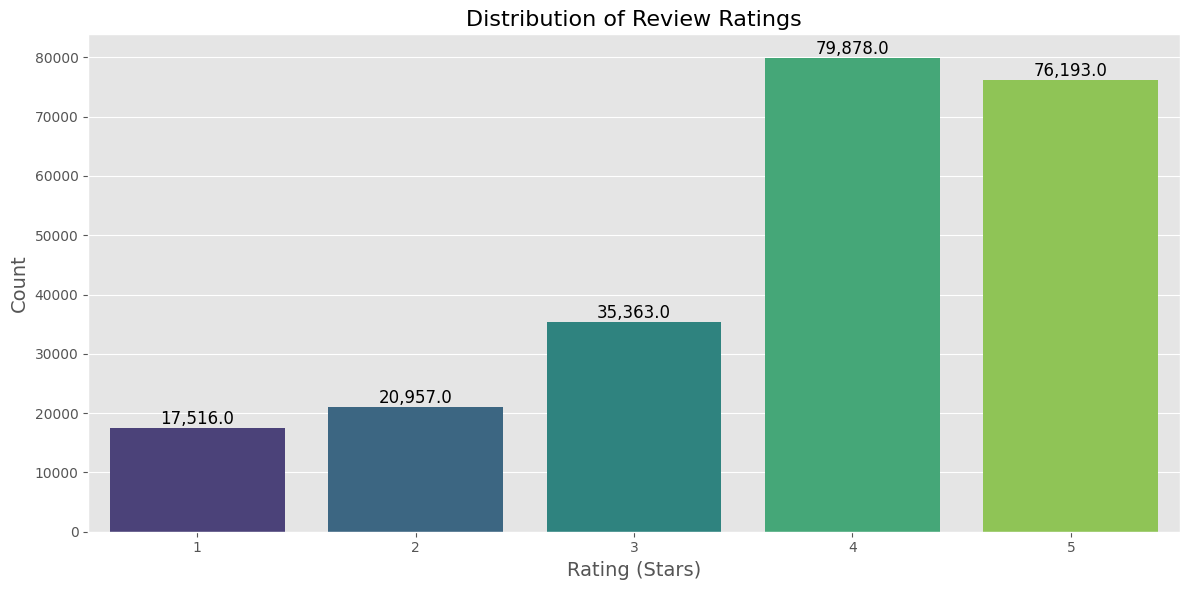

In [3]:
# Review ratings distribution
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='stars', data=cleaned_reviews_df, palette='viridis')
plt.title('Distribution of Review Ratings', fontsize=16)
plt.xlabel('Rating (Stars)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha='center', va='bottom', 
               fontsize=12)

plt.tight_layout()
plt.show()


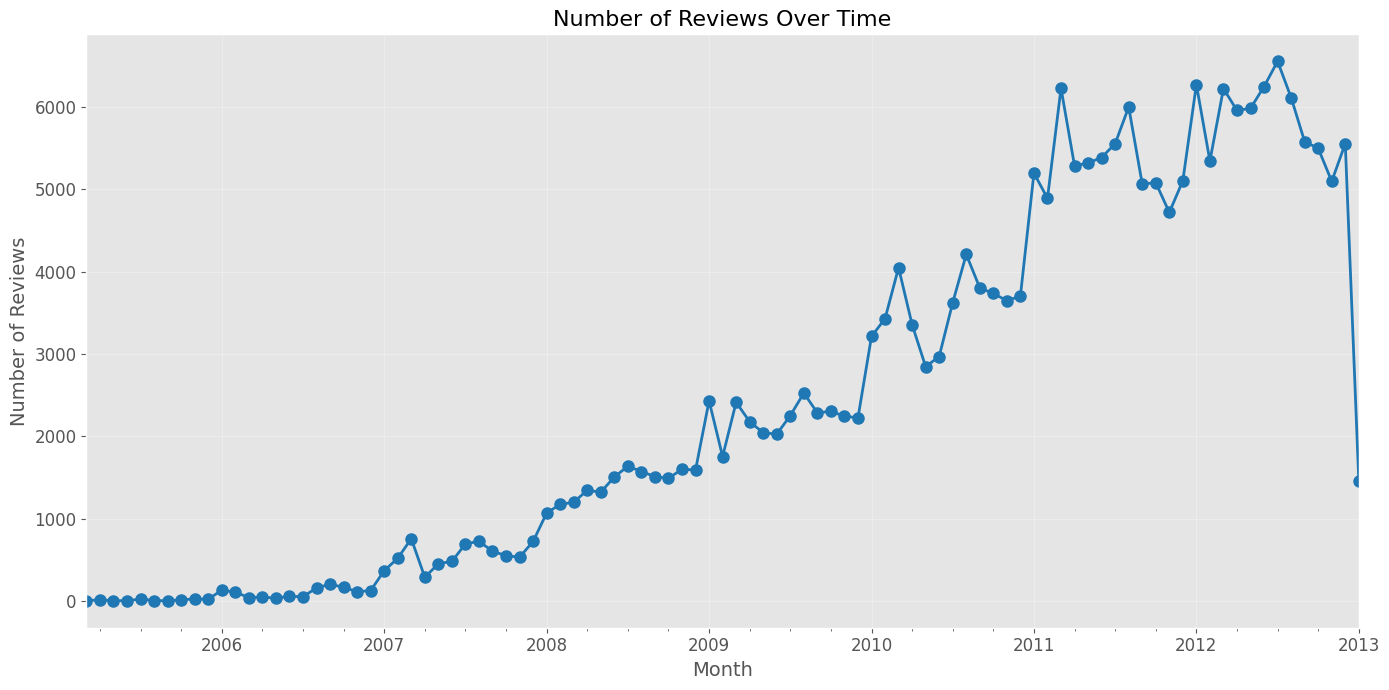

In [4]:
# Reviews over time
if 'date' in cleaned_reviews_df.columns:
    reviews_per_month = cleaned_reviews_df.groupby(
        cleaned_reviews_df['date'].dt.to_period('M')
    ).size()
    
    plt.figure(figsize=(14, 7))
    reviews_per_month.plot(kind='line', marker='o', linewidth=2, markersize=8, color='#1f77b4')
    plt.title('Number of Reviews Over Time', fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Number of Reviews', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()


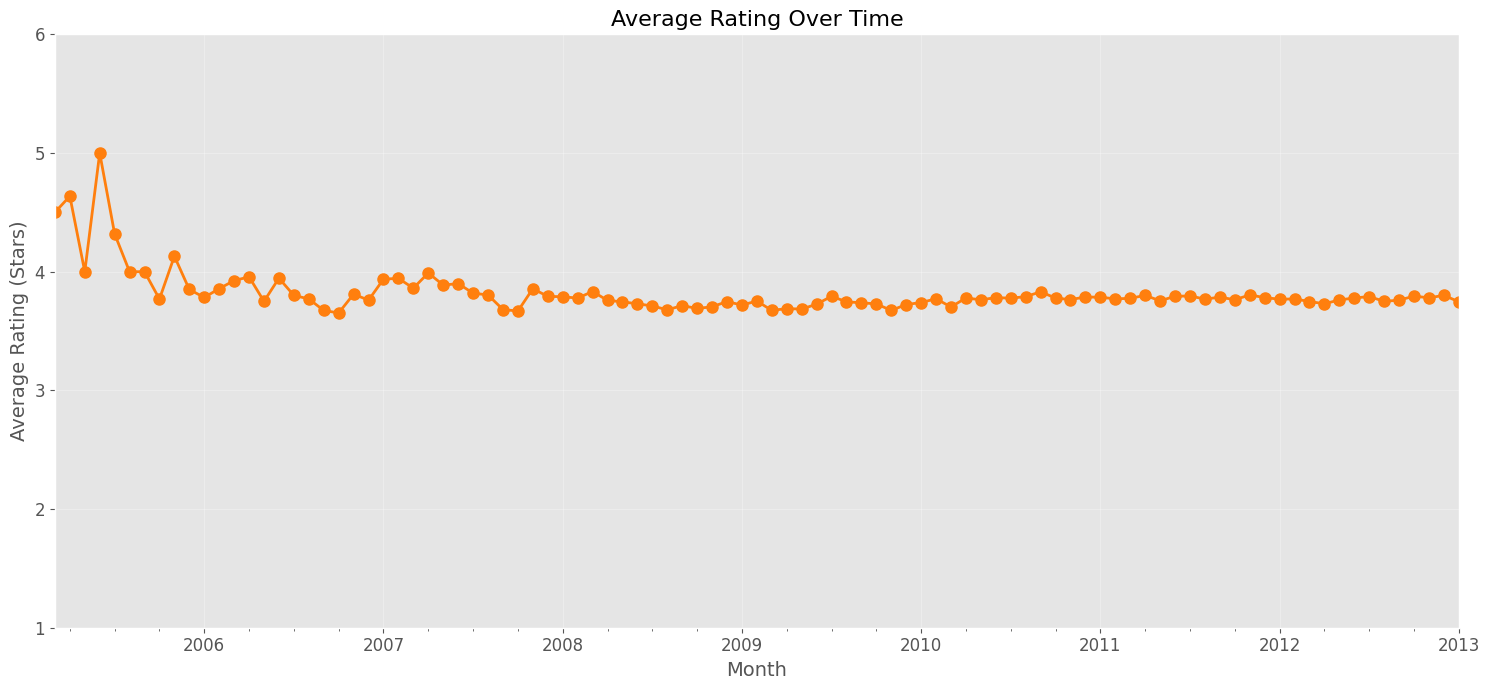

In [7]:
# Average rating over time
if 'date' in cleaned_reviews_df.columns:
    avg_rating_per_month = cleaned_reviews_df.groupby(
        cleaned_reviews_df['date'].dt.to_period('M')
    )['stars'].mean()
    
    plt.figure(figsize=(15, 7))
    avg_rating_per_month.plot(kind='line', marker='o', linewidth=2, markersize=8, color='#ff7f0e')
    plt.title('Average Rating Over Time', fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Average Rating (Stars)', fontsize=14)
    plt.ylim(1, 6)
    plt.grid(True, alpha=0.3)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()


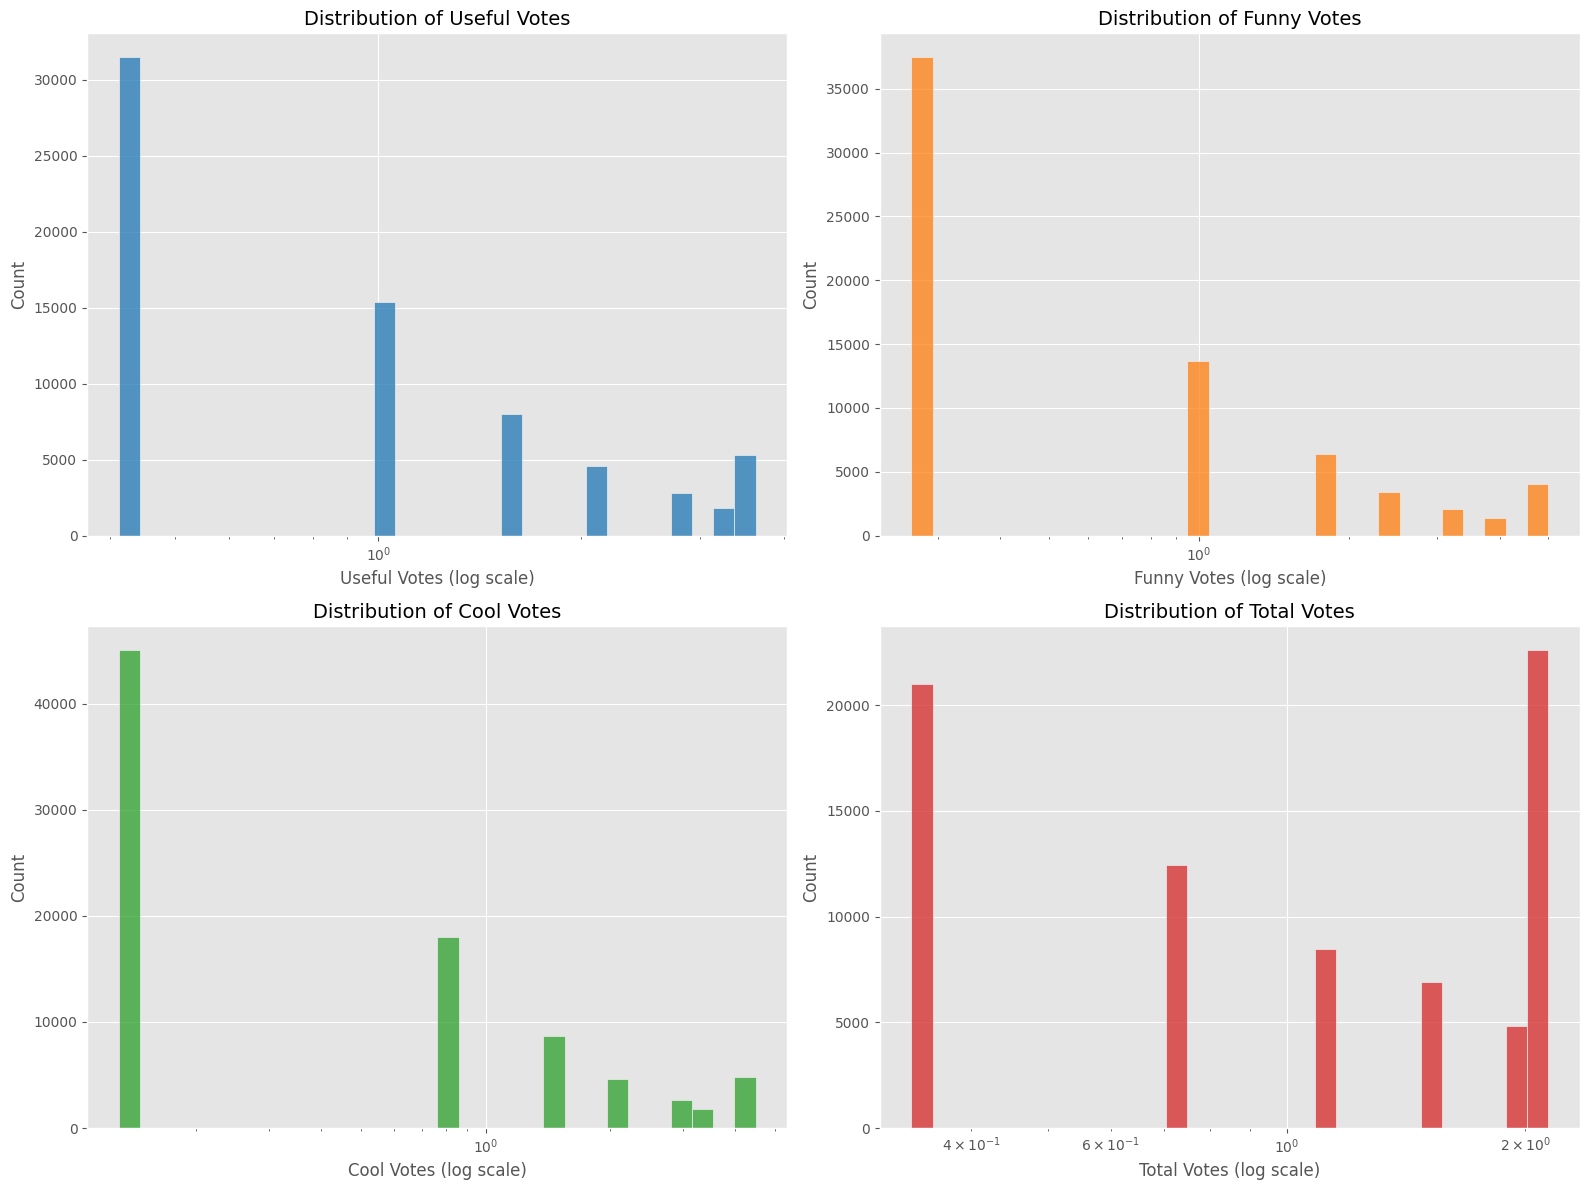

In [8]:
# Votes distribution
if all(col in cleaned_reviews_df.columns for col in ['useful_votes', 'funny_votes', 'cool_votes', 'total_votes']):
    plt.figure(figsize=(16, 12))
    
    plt.subplot(2, 2, 1)
    sns.histplot(cleaned_reviews_df['useful_votes'], log_scale=True, bins=30, color='#1f77b4')
    plt.title('Distribution of Useful Votes', fontsize=14)
    plt.xlabel('Useful Votes (log scale)', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    plt.subplot(2, 2, 2)
    sns.histplot(cleaned_reviews_df['funny_votes'], log_scale=True, bins=30, color='#ff7f0e')
    plt.title('Distribution of Funny Votes', fontsize=14)
    plt.xlabel('Funny Votes (log scale)', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    plt.subplot(2, 2, 3)
    sns.histplot(cleaned_reviews_df['cool_votes'], log_scale=True, bins=30, color='#2ca02c')
    plt.title('Distribution of Cool Votes', fontsize=14)
    plt.xlabel('Cool Votes (log scale)', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    plt.subplot(2, 2, 4)
    sns.histplot(cleaned_reviews_df['total_votes'], log_scale=True, bins=30, color='#d62728')
    plt.title('Distribution of Total Votes', fontsize=14)
    plt.xlabel('Total Votes (log scale)', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    plt.tight_layout()
    plt.show()


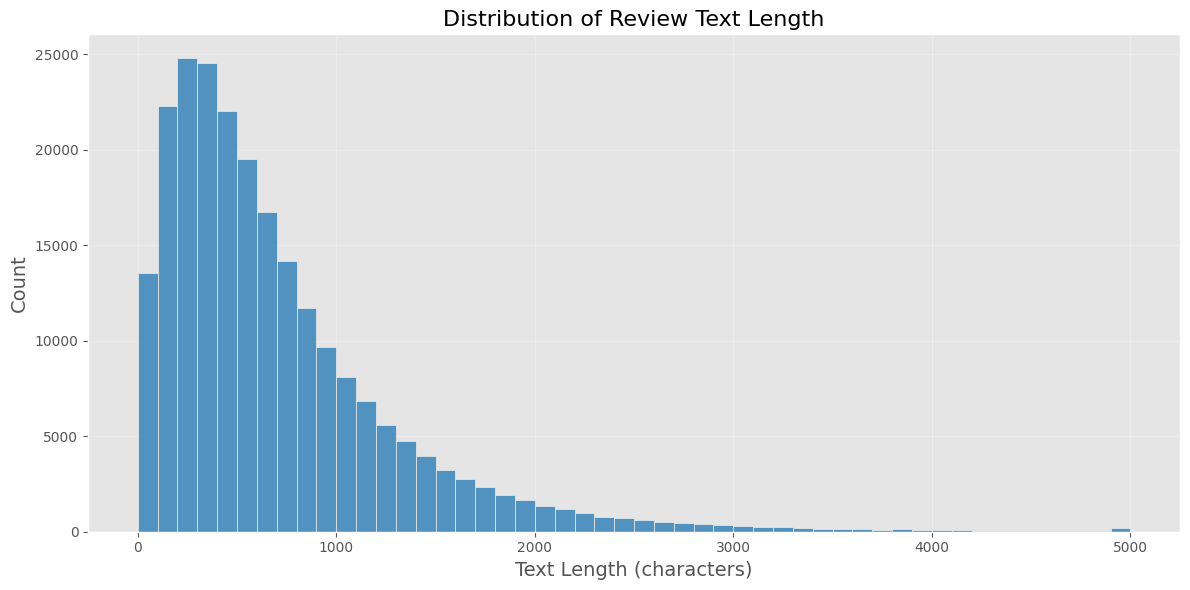

In [11]:
# Text length distribution
if 'text' in cleaned_reviews_df.columns:
    cleaned_reviews_df['text_length'] = cleaned_reviews_df['text'].str.len()

    plt.figure(figsize=(12, 6))
    sns.histplot(data=cleaned_reviews_df, x='text_length', bins=50, color='#1f77b4')
    plt.title('Distribution of Review Text Length', fontsize=16)
    plt.xlabel('Text Length (characters)', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


In [12]:
# Check if the DataFrame is empty
print(f"DataFrame shape: {cleaned_reviews_df.shape}")

# Check if 'text_length' exists
if 'text_length' in cleaned_reviews_df.columns:
    print(cleaned_reviews_df['text_length'].describe())
else:
    print("'text_length' column is missing.")

DataFrame shape: (229907, 18)
count    229901.000000
mean        707.739540
std         620.035174
min           1.000000
25%         288.000000
50%         539.000000
75%         931.000000
max        5000.000000
Name: text_length, dtype: float64


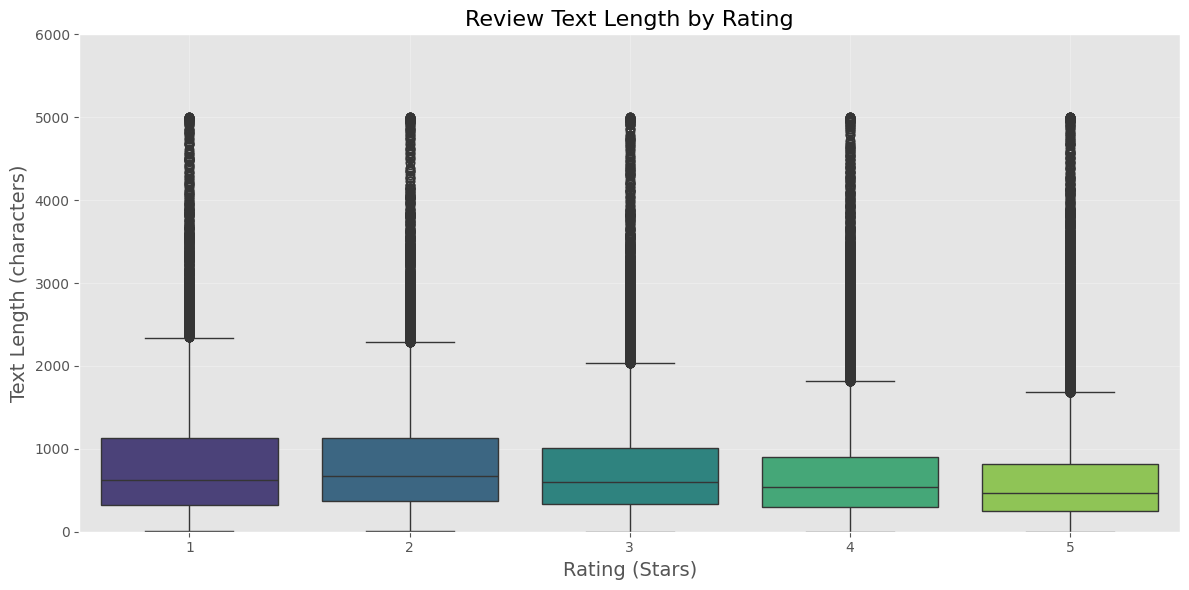

In [15]:
# Text length by rating
if 'text' in cleaned_reviews_df.columns:
    cleaned_reviews_df['text_length'] = cleaned_reviews_df['text'].str.len()
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='stars', y='text_length', data=cleaned_reviews_df, palette='viridis')
    plt.title('Review Text Length by Rating', fontsize=16)
    plt.xlabel('Rating (Stars)', fontsize=14)
    plt.ylabel('Text Length (characters)', fontsize=14)
    plt.ylim(0, 6000)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


## Business Dataset Visualizations

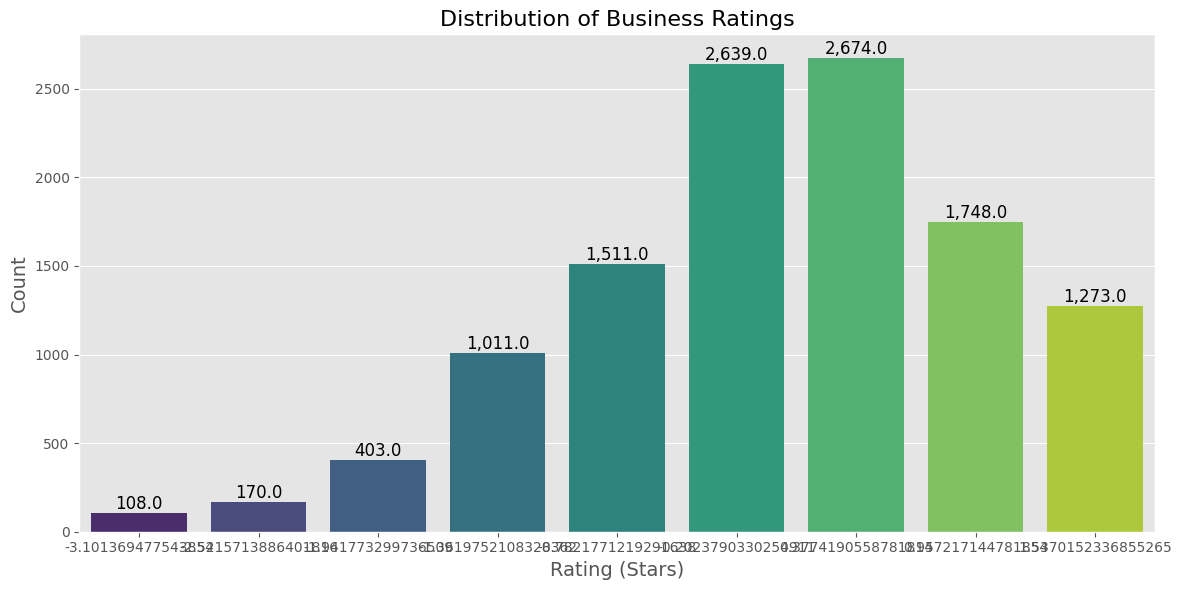

In [16]:
# Business ratings distribution
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='stars', data=cleaned_business_df, palette='viridis')
plt.title('Distribution of Business Ratings', fontsize=16)
plt.xlabel('Rating (Stars)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha='center', va='bottom', 
               fontsize=12)

plt.tight_layout()
plt.show()


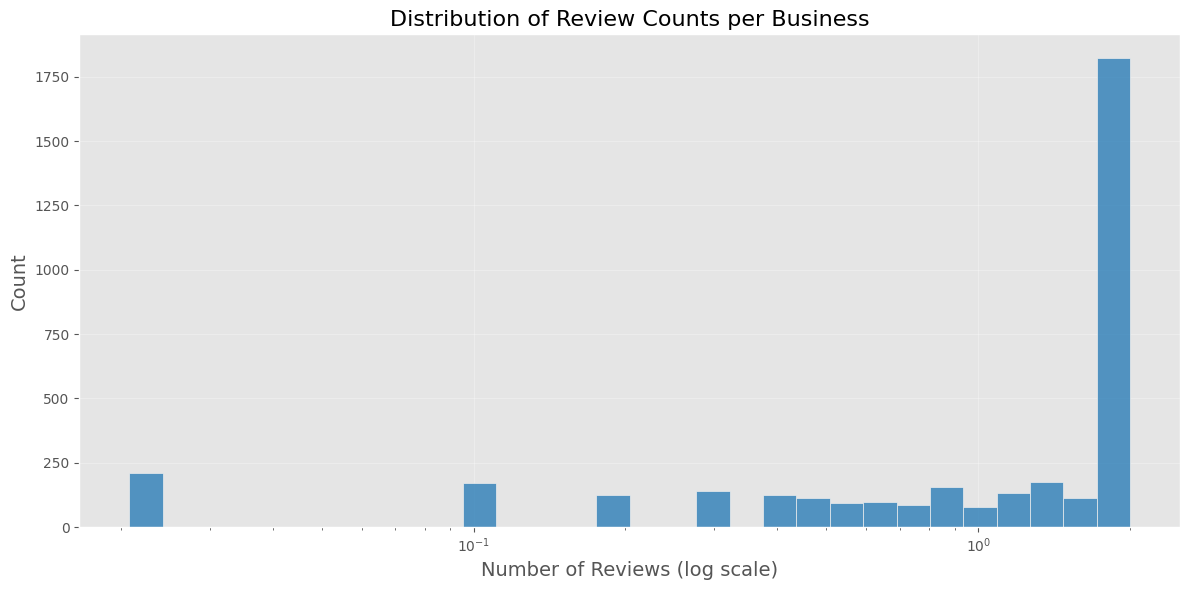

In [17]:
# Business review count distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=cleaned_business_df, x='review_count', bins=30, log_scale=True, color='#1f77b4')
plt.title('Distribution of Review Counts per Business', fontsize=16)
plt.xlabel('Number of Reviews (log scale)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


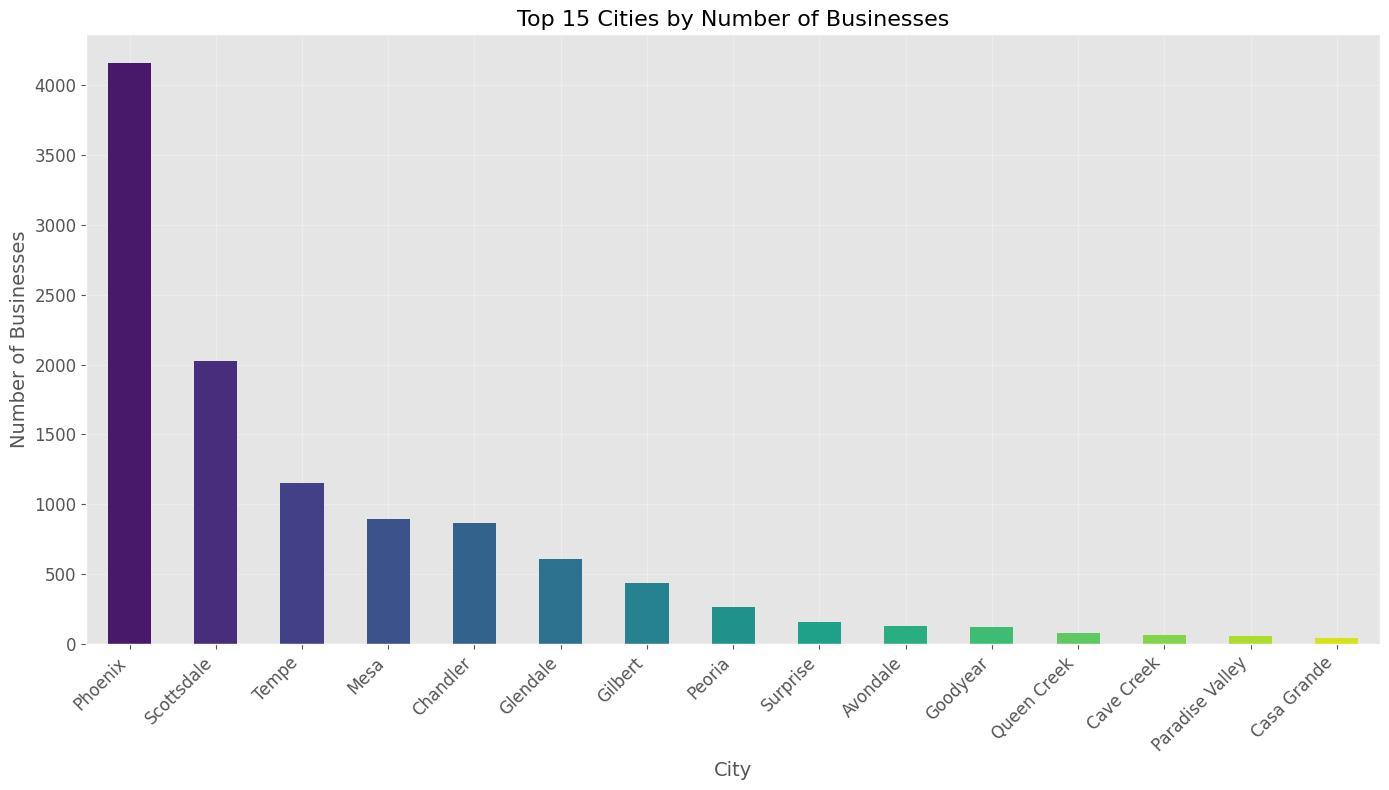

In [18]:
# Top cities
top_cities = cleaned_business_df['city'].value_counts().head(15)

plt.figure(figsize=(14, 8))
top_cities.plot(kind='bar', color=sns.color_palette('viridis', 15))
plt.title('Top 15 Cities by Number of Businesses', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Number of Businesses', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


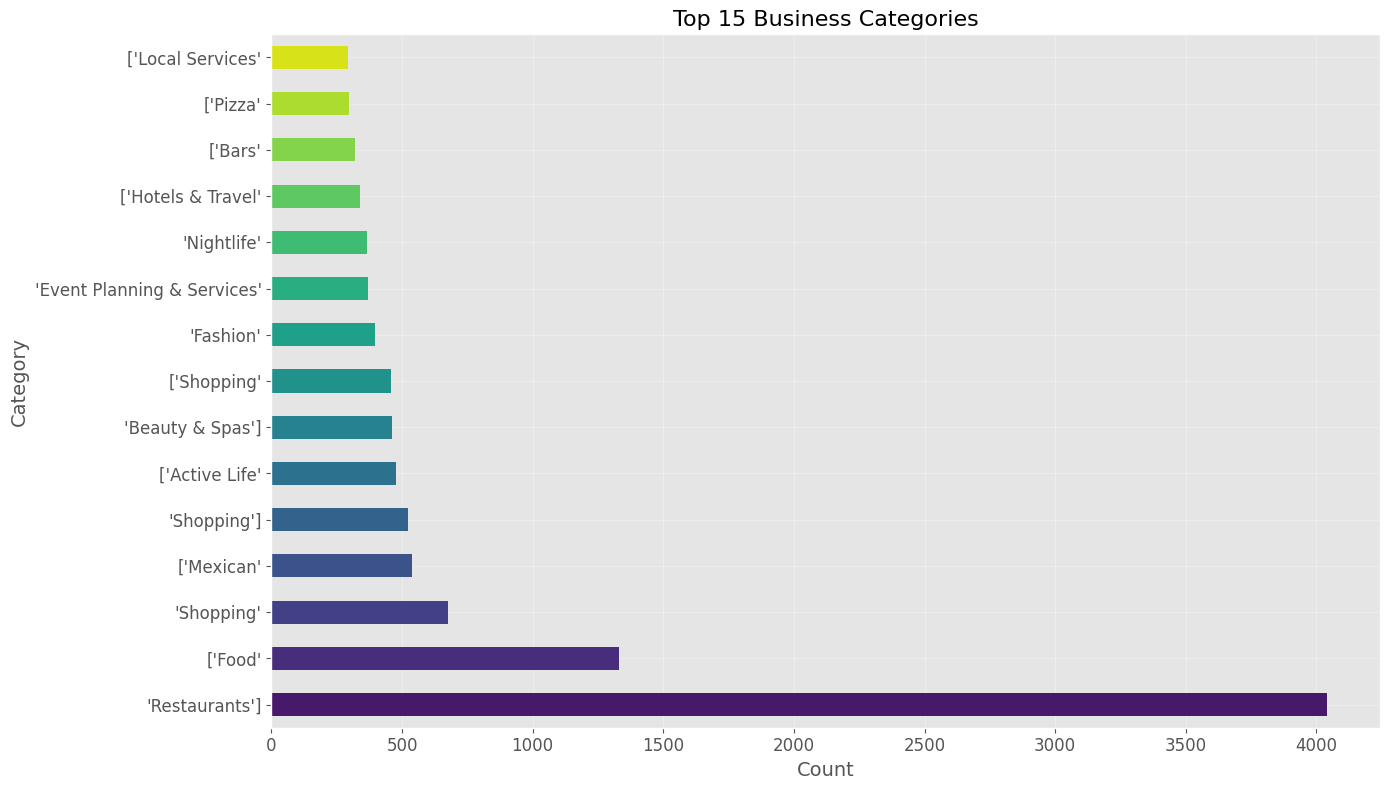

In [19]:
# Top categories
if 'categories' in cleaned_business_df.columns:
    all_categories = []
    for categories in cleaned_business_df['categories'].dropna():
        if categories:
            all_categories.extend([c.strip() for c in categories.split(',')])
    
    category_counts = pd.Series(all_categories).value_counts().head(15)
    
    plt.figure(figsize=(14, 8))
    category_counts.plot(kind='barh', color=sns.color_palette('viridis', 15))
    plt.title('Top 15 Business Categories', fontsize=16)
    plt.xlabel('Count', fontsize=14)
    plt.ylabel('Category', fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


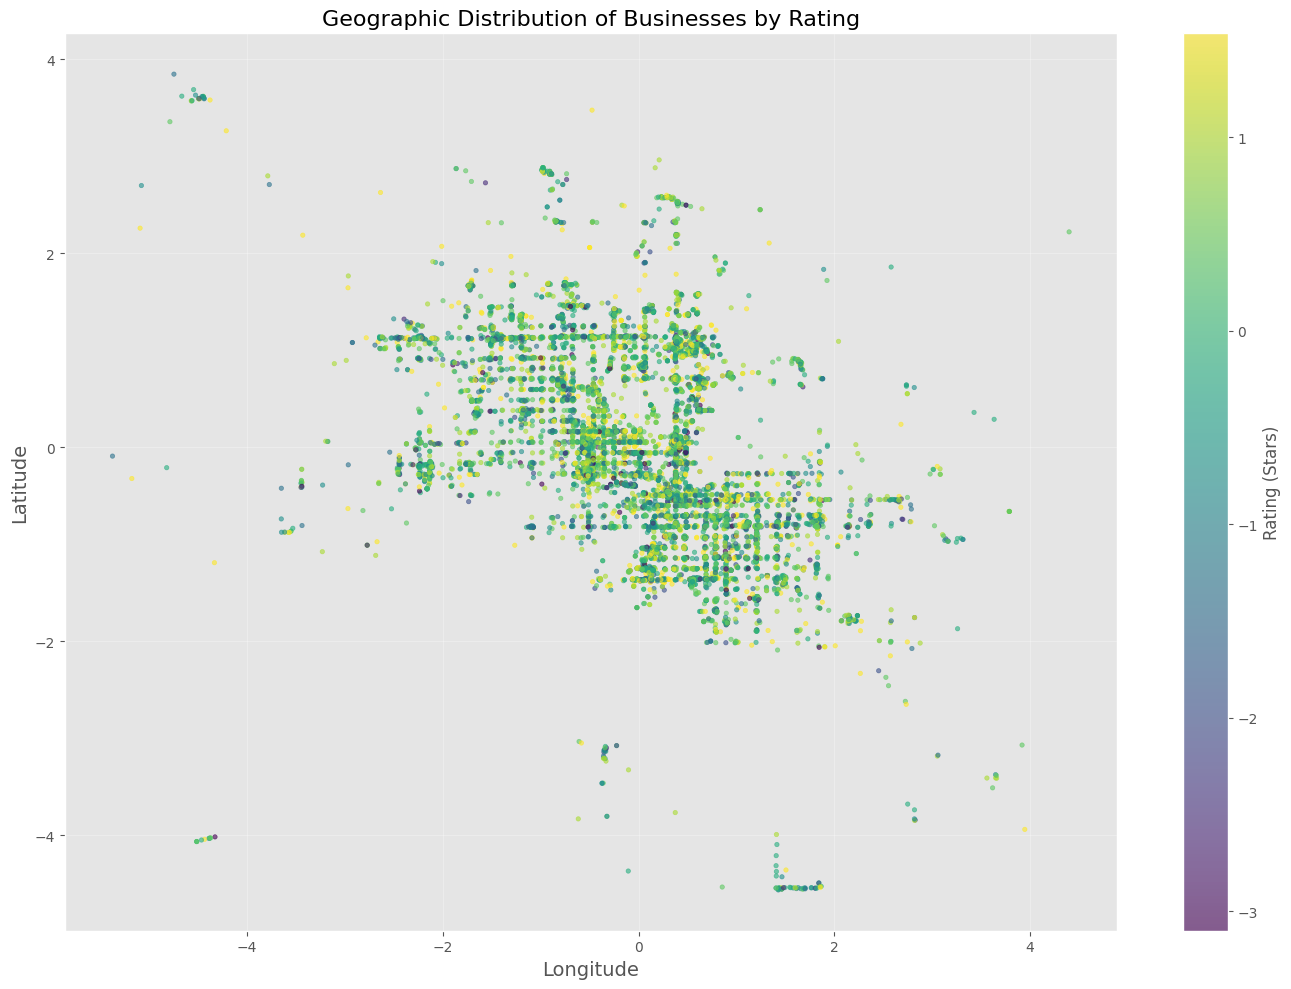

In [20]:
# Geographic distribution
if 'latitude' in cleaned_business_df.columns and 'longitude' in cleaned_business_df.columns:
    plt.figure(figsize=(14, 10))
    scatter = plt.scatter(
        cleaned_business_df['longitude'], 
        cleaned_business_df['latitude'], 
        c=cleaned_business_df['stars'],
        cmap='viridis',
        alpha=0.6,
        s=10
    )
    plt.colorbar(scatter, label='Rating (Stars)')
    plt.title('Geographic Distribution of Businesses by Rating', fontsize=16)
    plt.xlabel('Longitude', fontsize=14)
    plt.ylabel('Latitude', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


## User Dataset Visualizations


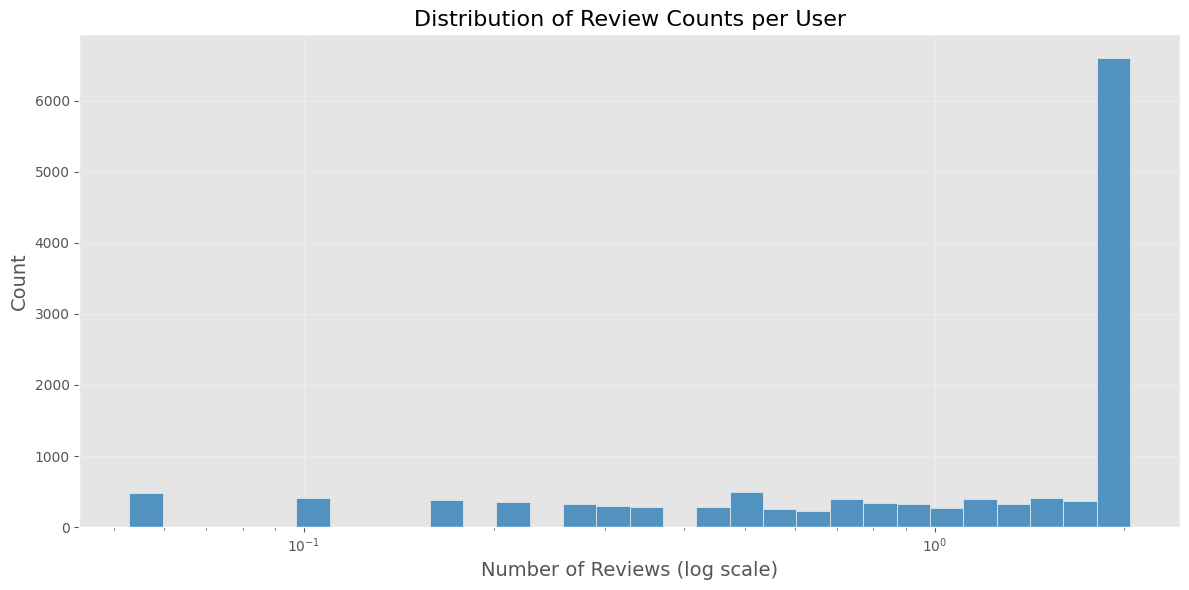

In [21]:
# User review count distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=cleaned_users_df, x='review_count', bins=30, log_scale=True, color='#1f77b4')
plt.title('Distribution of Review Counts per User', fontsize=16)
plt.xlabel('Number of Reviews (log scale)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


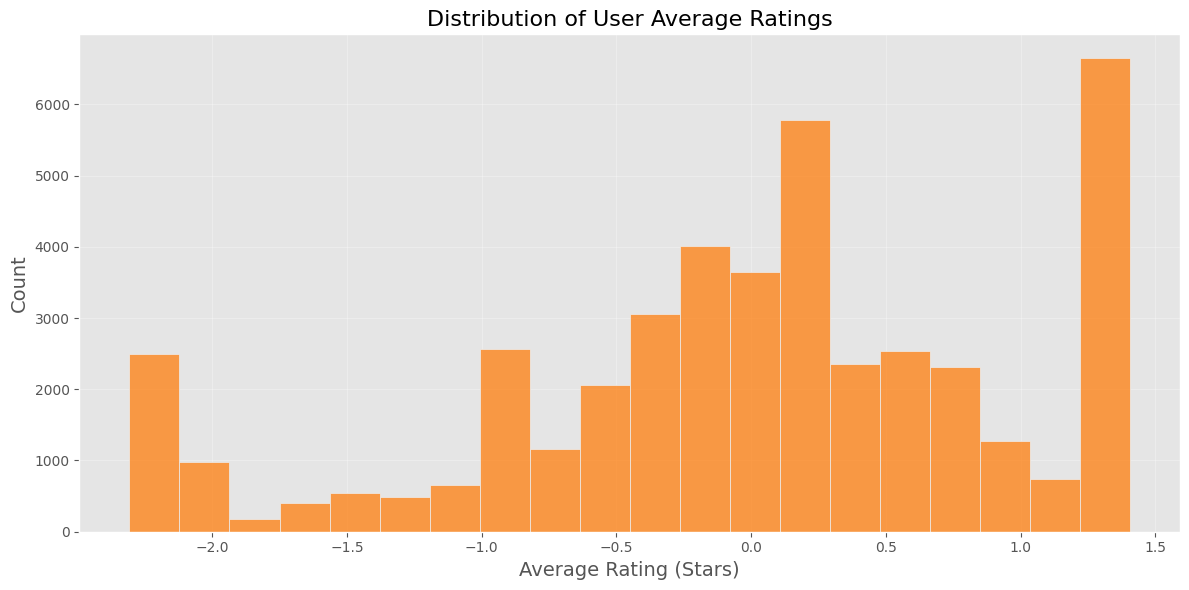

In [22]:
# Average stars distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=cleaned_users_df, x='average_stars', bins=20, color='#ff7f0e')
plt.title('Distribution of User Average Ratings', fontsize=16)
plt.xlabel('Average Rating (Stars)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


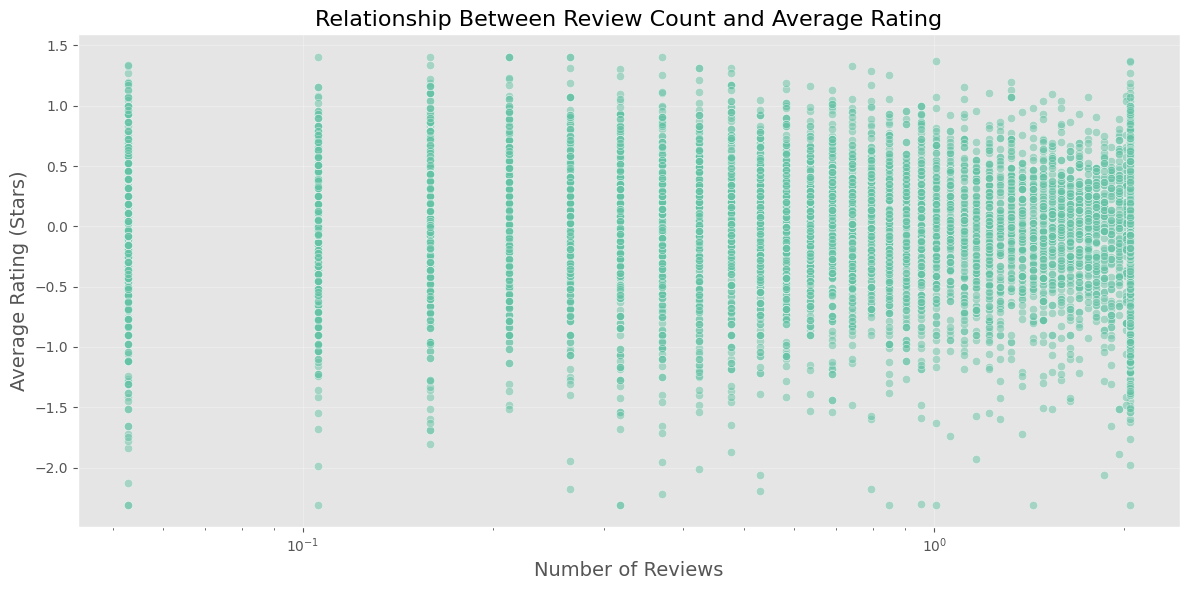

In [23]:
# Relationship between review count and average stars
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cleaned_users_df, x='review_count', y='average_stars', alpha=0.5)
plt.title('Relationship Between Review Count and Average Rating', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=14)
plt.ylabel('Average Rating (Stars)', fontsize=14)
plt.xscale('log')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


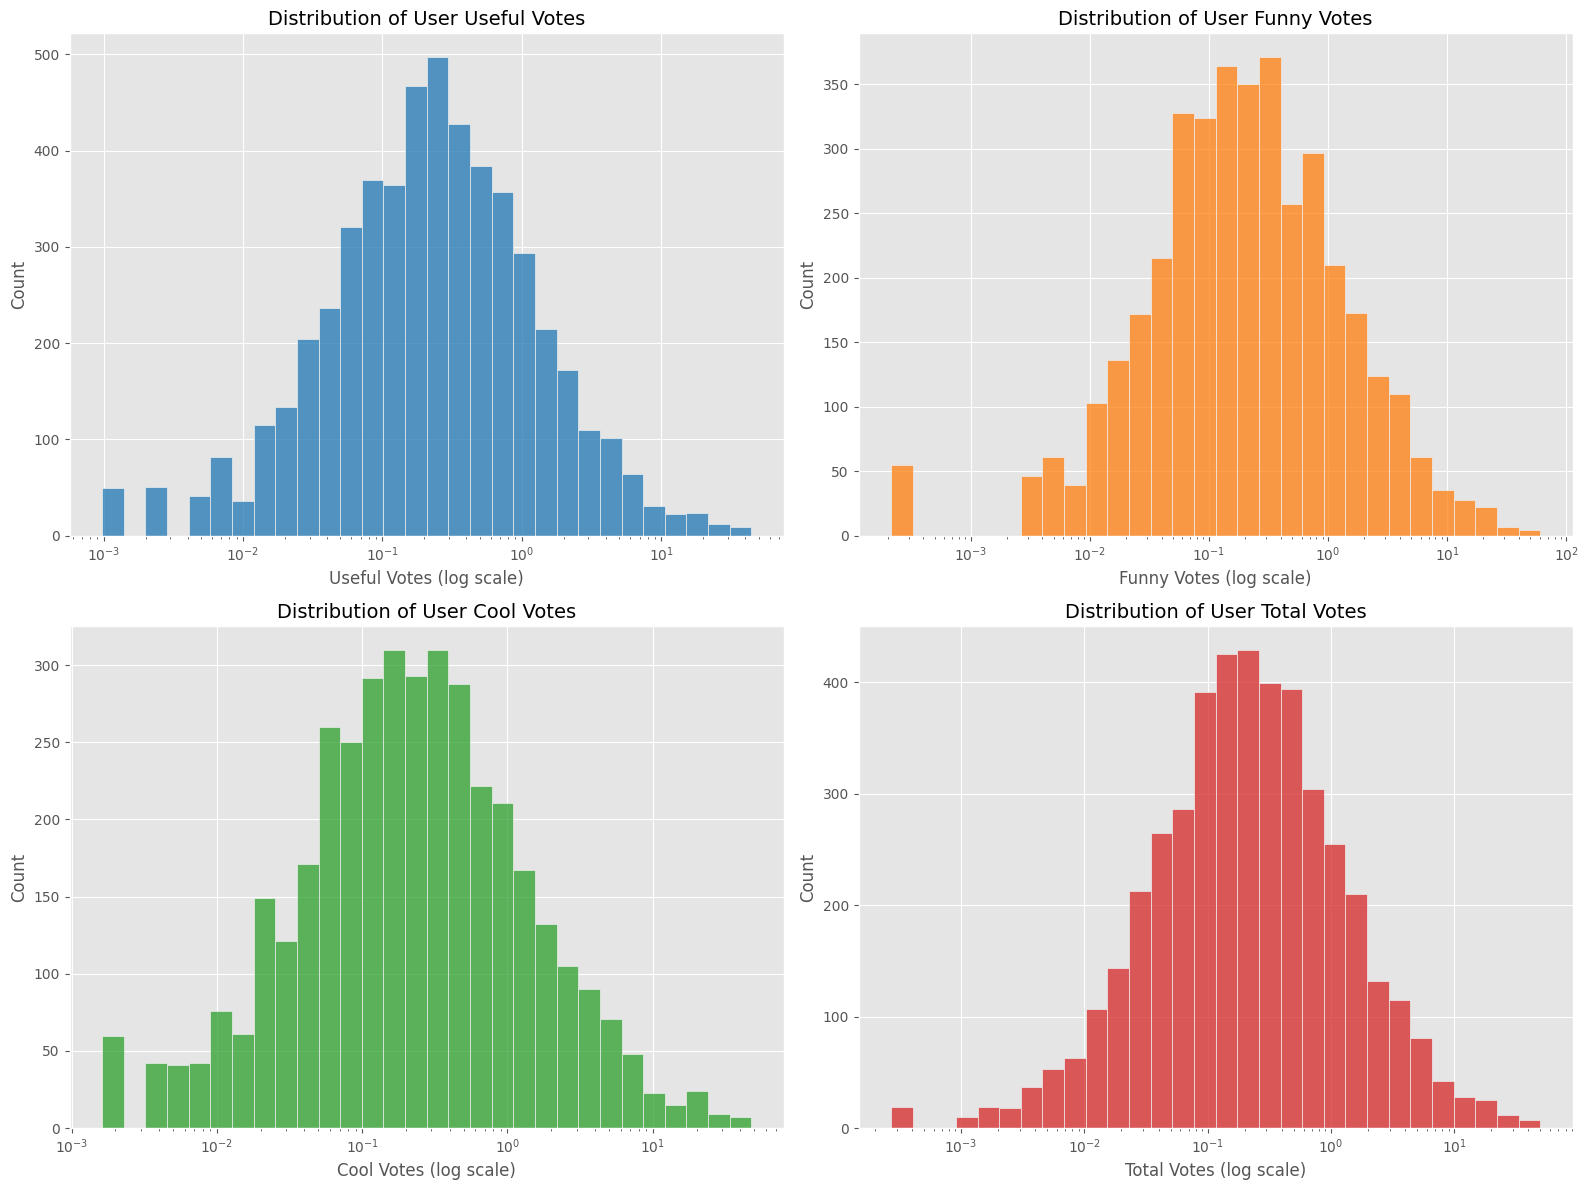

In [24]:
# User votes distribution (if available)
if all(col in cleaned_users_df.columns for col in ['useful_votes', 'funny_votes', 'cool_votes', 'total_votes']):
    plt.figure(figsize=(16, 12))
    
    plt.subplot(2, 2, 1)
    sns.histplot(cleaned_users_df['useful_votes'], log_scale=True, bins=30, color='#1f77b4')
    plt.title('Distribution of User Useful Votes', fontsize=14)
    plt.xlabel('Useful Votes (log scale)', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    plt.subplot(2, 2, 2)
    sns.histplot(cleaned_users_df['funny_votes'], log_scale=True, bins=30, color='#ff7f0e')
    plt.title('Distribution of User Funny Votes', fontsize=14)
    plt.xlabel('Funny Votes (log scale)', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    plt.subplot(2, 2, 3)
    sns.histplot(cleaned_users_df['cool_votes'], log_scale=True, bins=30, color='#2ca02c')
    plt.title('Distribution of User Cool Votes', fontsize=14)
    plt.xlabel('Cool Votes (log scale)', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    plt.subplot(2, 2, 4)
    sns.histplot(cleaned_users_df['total_votes'], log_scale=True, bins=30, color='#d62728')
    plt.title('Distribution of User Total Votes', fontsize=14)
    plt.xlabel('Total Votes (log scale)', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    plt.tight_layout()
    plt.show()


## Text Analysis Visualizations

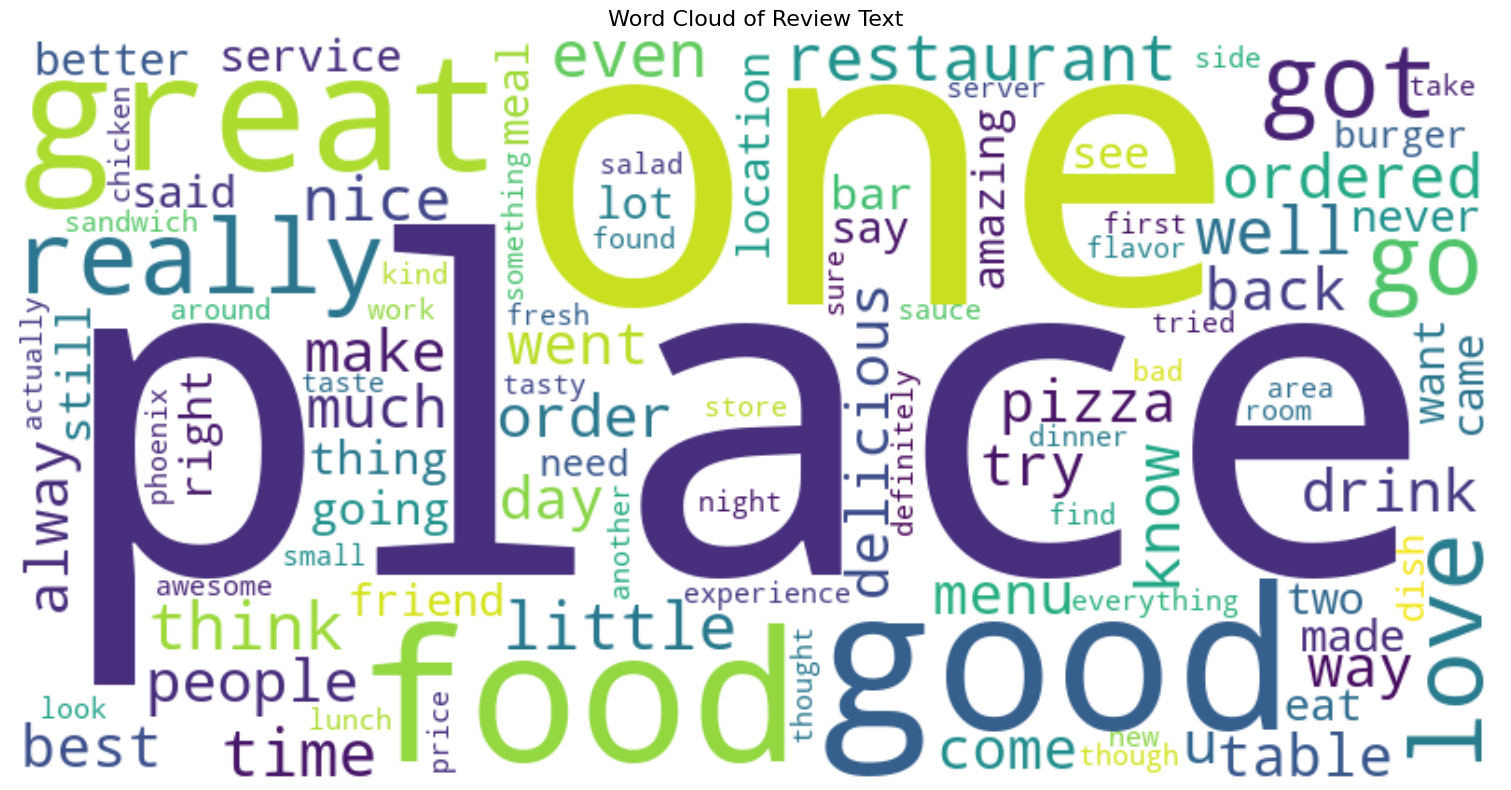

In [25]:
# Word cloud for all reviews
if 'processed_text' in cleaned_reviews_df.columns:
    # Create a sample for text analysis (to avoid memory issues)
    sample_size = min(10000, len(cleaned_reviews_df))
    sample_reviews = cleaned_reviews_df.sample(sample_size, random_state=42)
    
    # Word cloud for all reviews
    all_text = ' '.join(sample_reviews['processed_text'].dropna())
    
    if all_text:
        wordcloud = WordCloud(
            width=800, 
            height=400, 
            background_color='white',
            max_words=100,
            contour_width=3,
            contour_color='steelblue'
        ).generate(all_text)
        
        plt.figure(figsize=(16, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud of Review Text', fontsize=16)
        plt.tight_layout()
        plt.show()


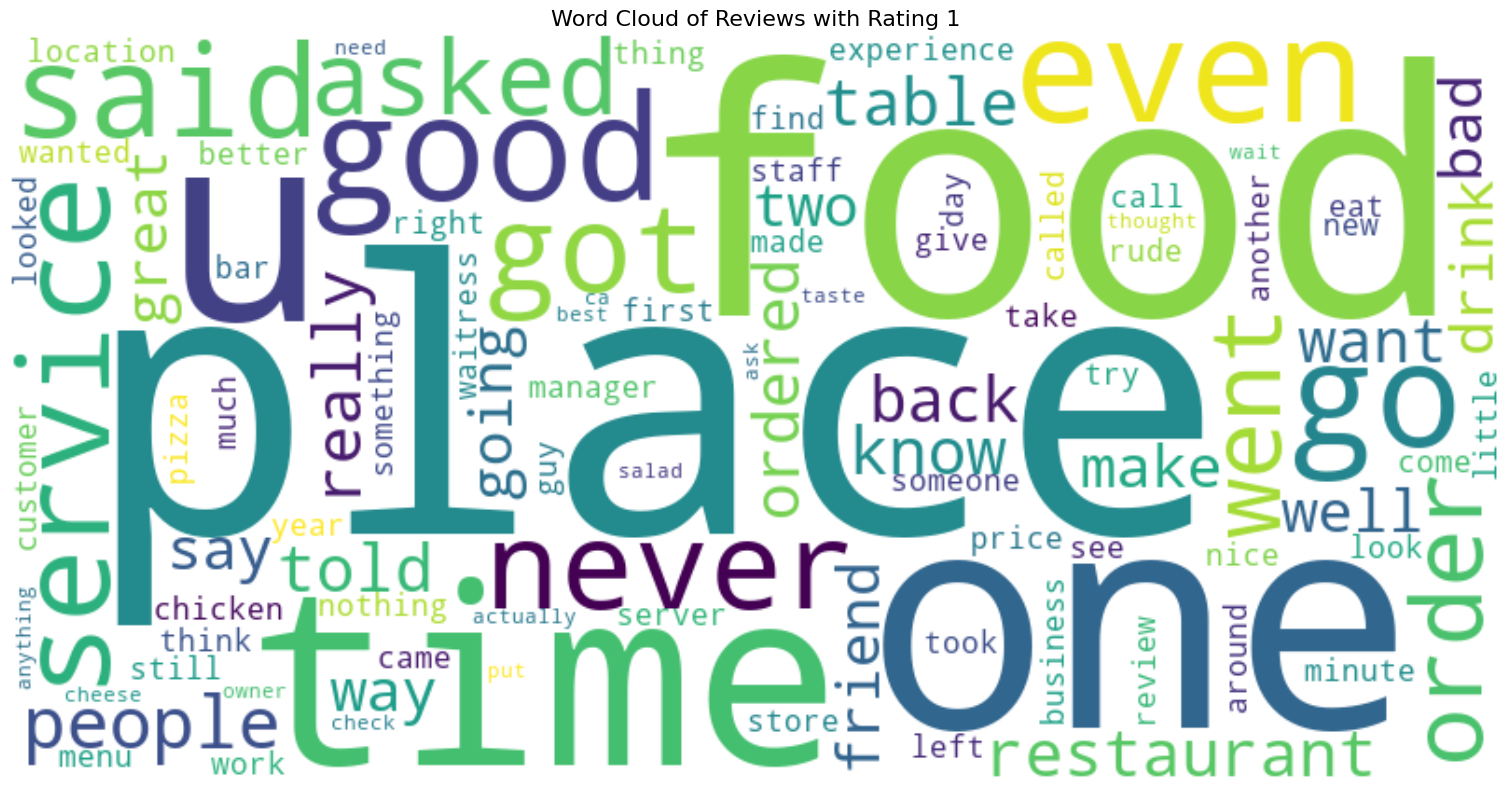

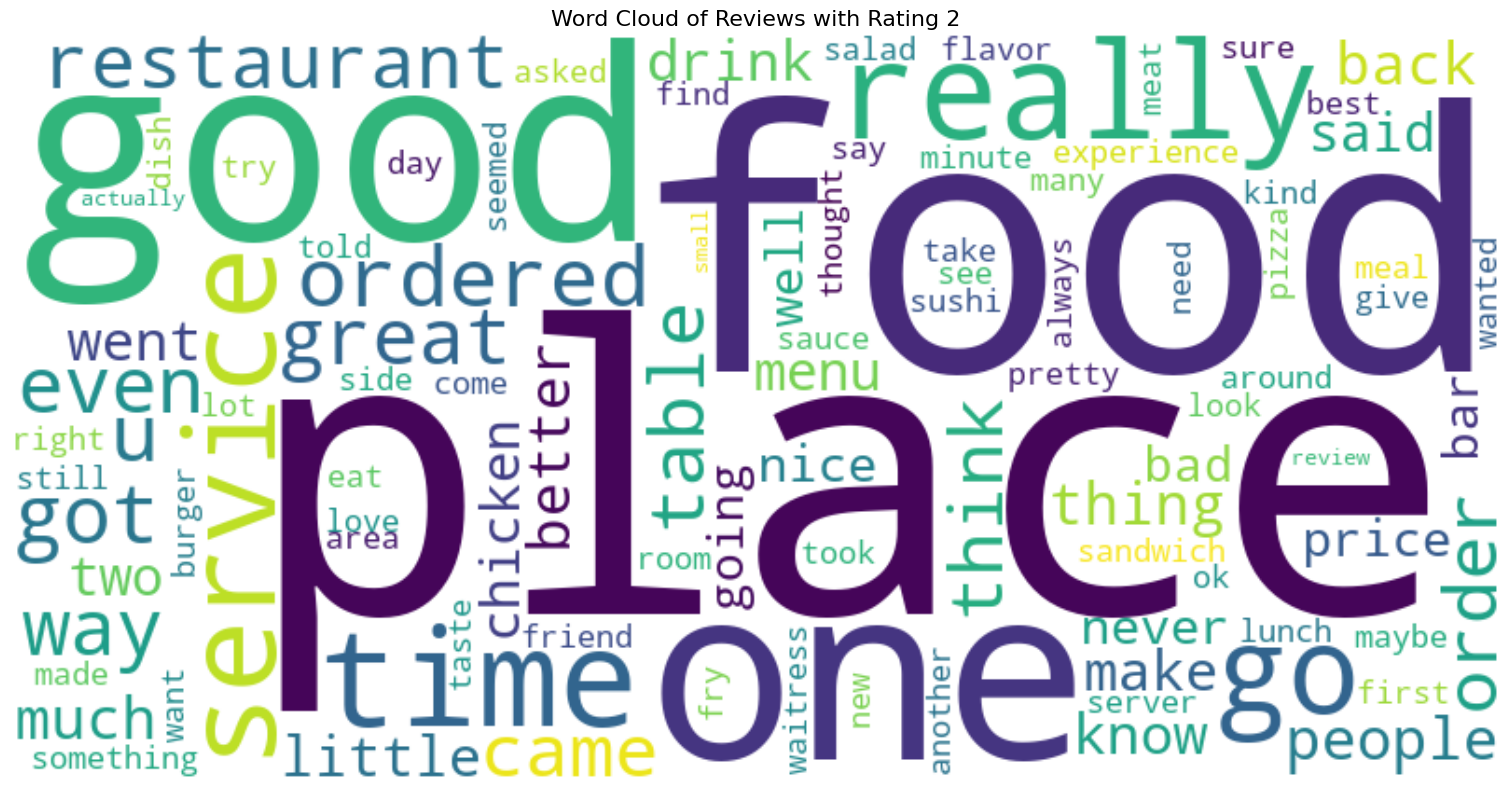

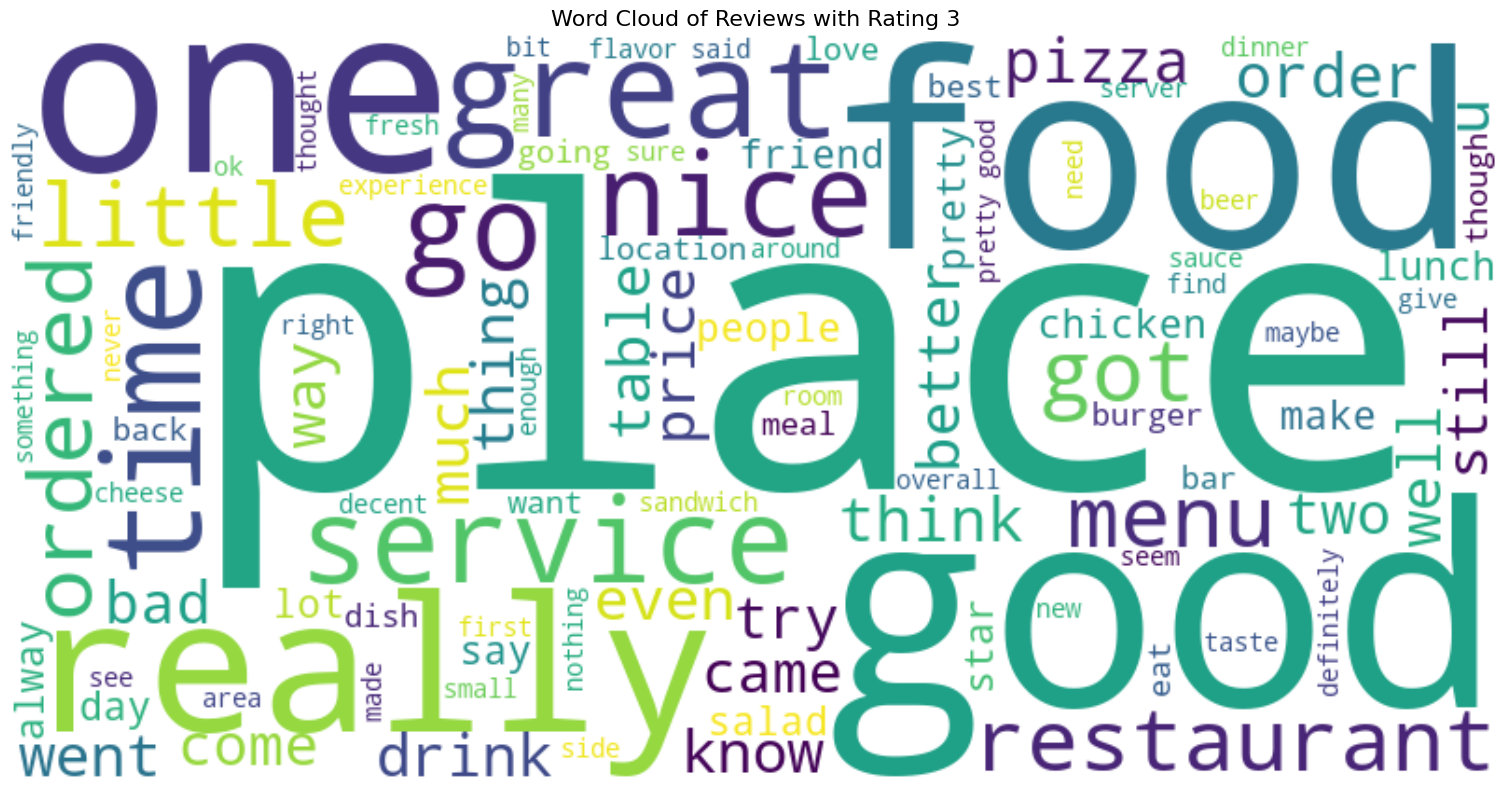

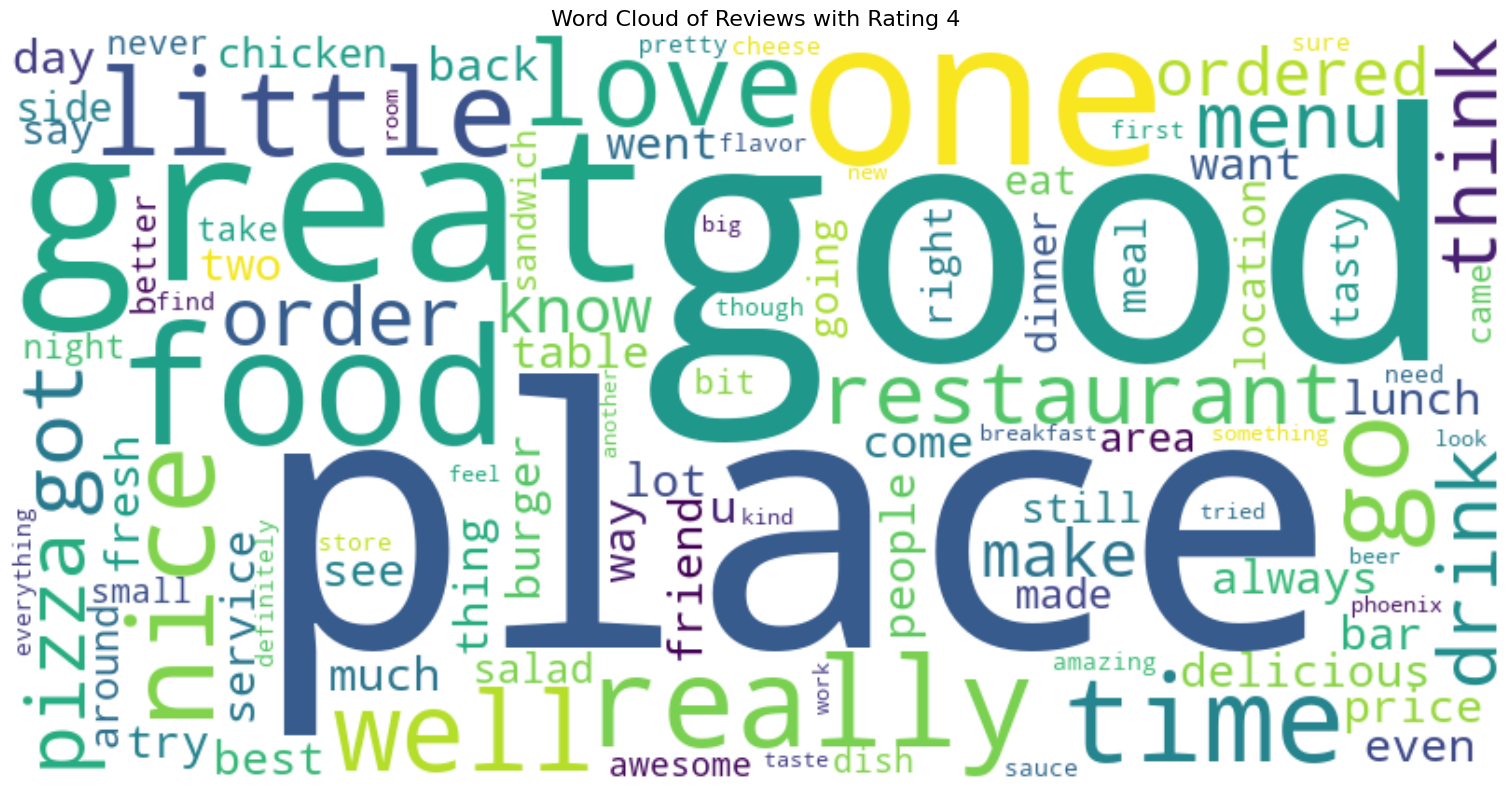

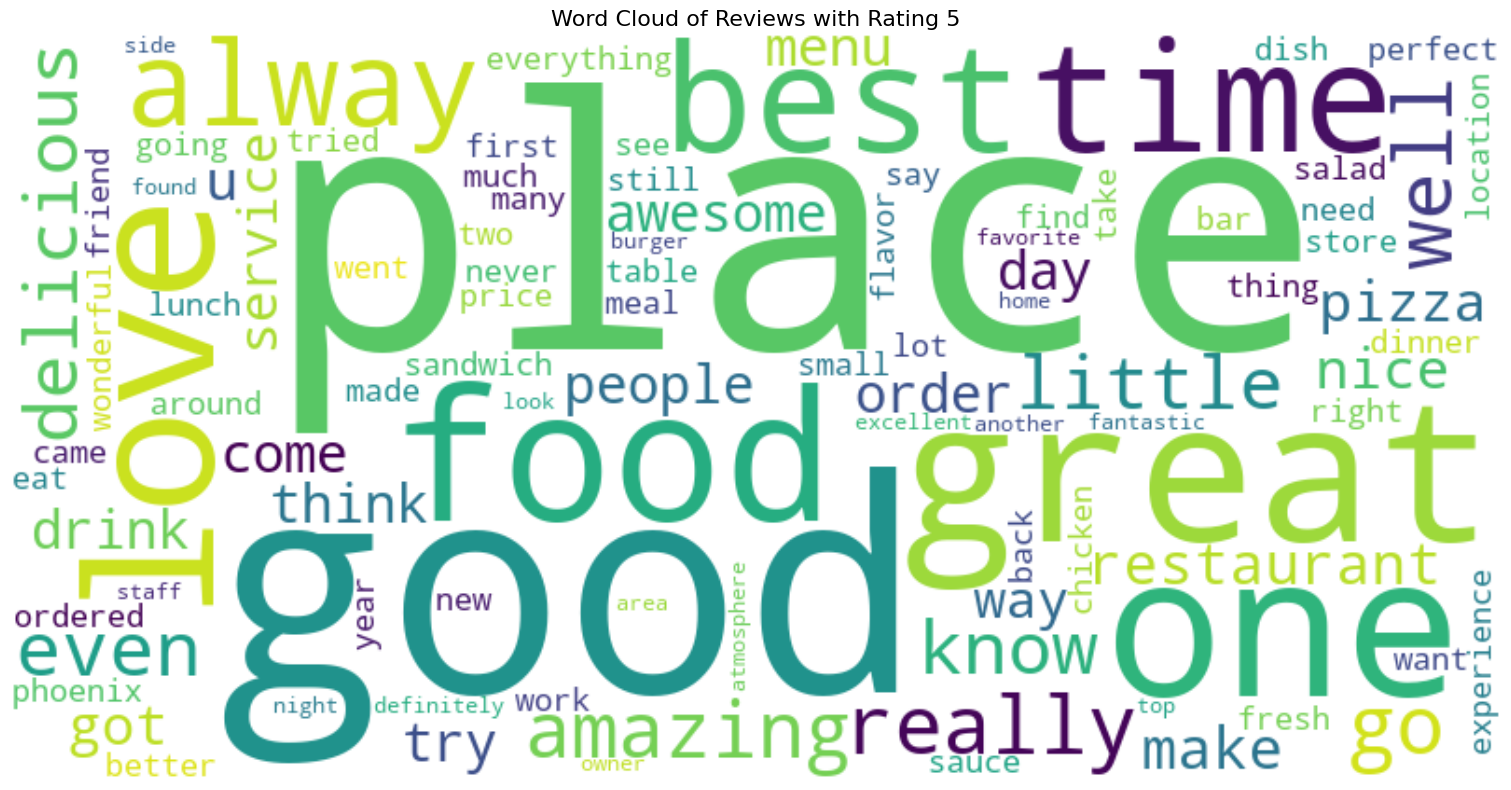

In [26]:
# Word clouds by rating
if 'processed_text' in cleaned_reviews_df.columns:
    # Create word clouds for each rating
    for rating in range(1, 6):
        rating_reviews = sample_reviews[sample_reviews['stars'] == rating]
        
        if len(rating_reviews) > 0:
            rating_text = ' '.join(rating_reviews['processed_text'].dropna())
            
            if rating_text:
                wordcloud = WordCloud(
                    width=800, 
                    height=400, 
                    background_color='white',
                    max_words=100,
                    contour_width=3,
                    contour_color='steelblue'
                ).generate(rating_text)
                
                plt.figure(figsize=(16, 8))
                plt.imshow(wordcloud, interpolation='bilinear')
                plt.axis('off')
                plt.title(f'Word Cloud of Reviews with Rating {rating}', fontsize=16)
                plt.tight_layout()
                plt.show()


## Cross-Dataset Visualizations

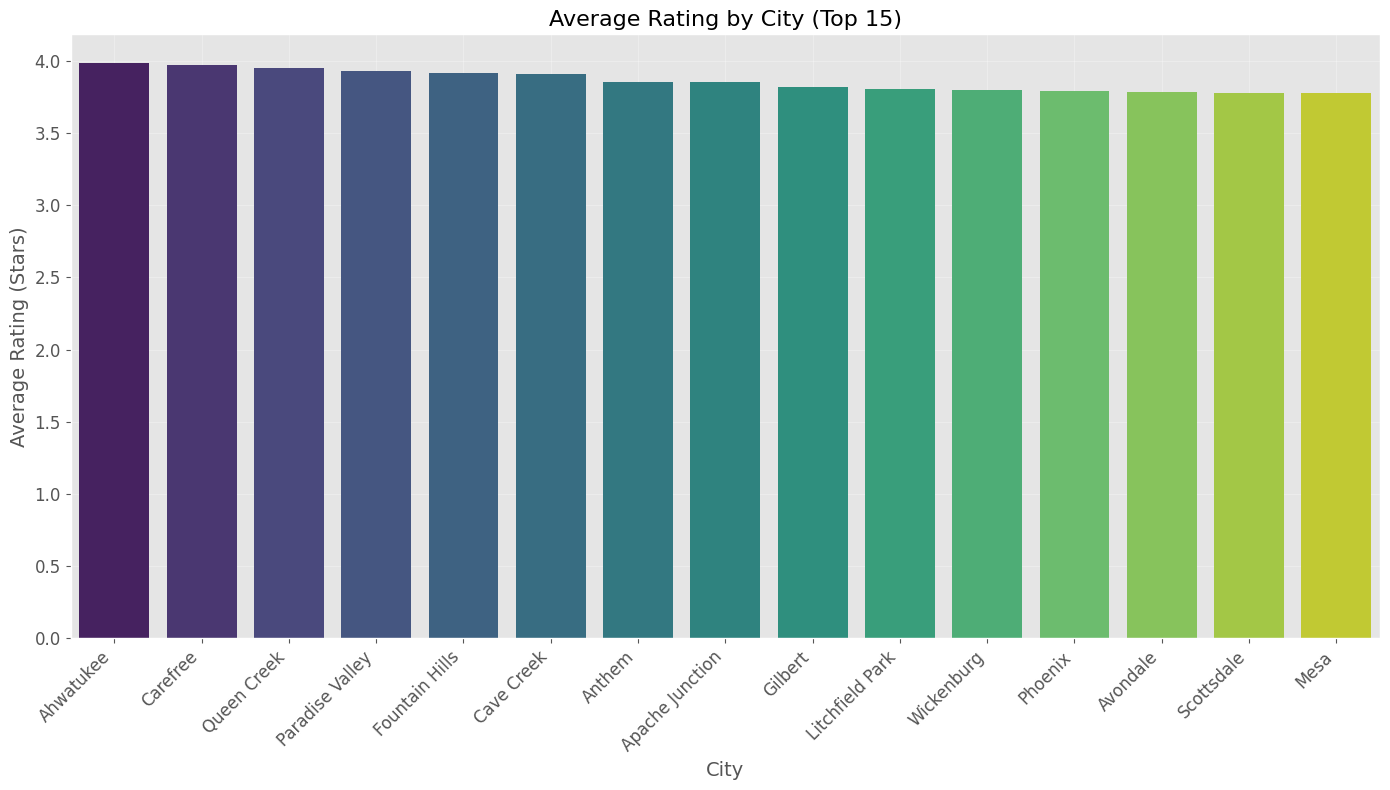

In [27]:
# Create a merged dataset for analysis
merged_df = cleaned_reviews_df.merge(
    cleaned_business_df[['business_id', 'name', 'city', 'state', 'stars', 'categories']],
    on='business_id',
    suffixes=('_review', '_business')
)

merged_df = merged_df.merge(
    cleaned_users_df[['user_id', 'name', 'review_count', 'average_stars']],
    on='user_id',
    suffixes=('', '_user')
)

# Ratings by city
city_ratings = merged_df.groupby('city')['stars_review'].agg(['mean', 'count']).reset_index()
city_ratings.columns = ['City', 'Average Rating', 'Review Count']
city_ratings = city_ratings[city_ratings['Review Count'] > 100].sort_values('Average Rating', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x='City', y='Average Rating', data=city_ratings.head(15), palette='viridis')
plt.title('Average Rating by City (Top 15)', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Average Rating (Stars)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


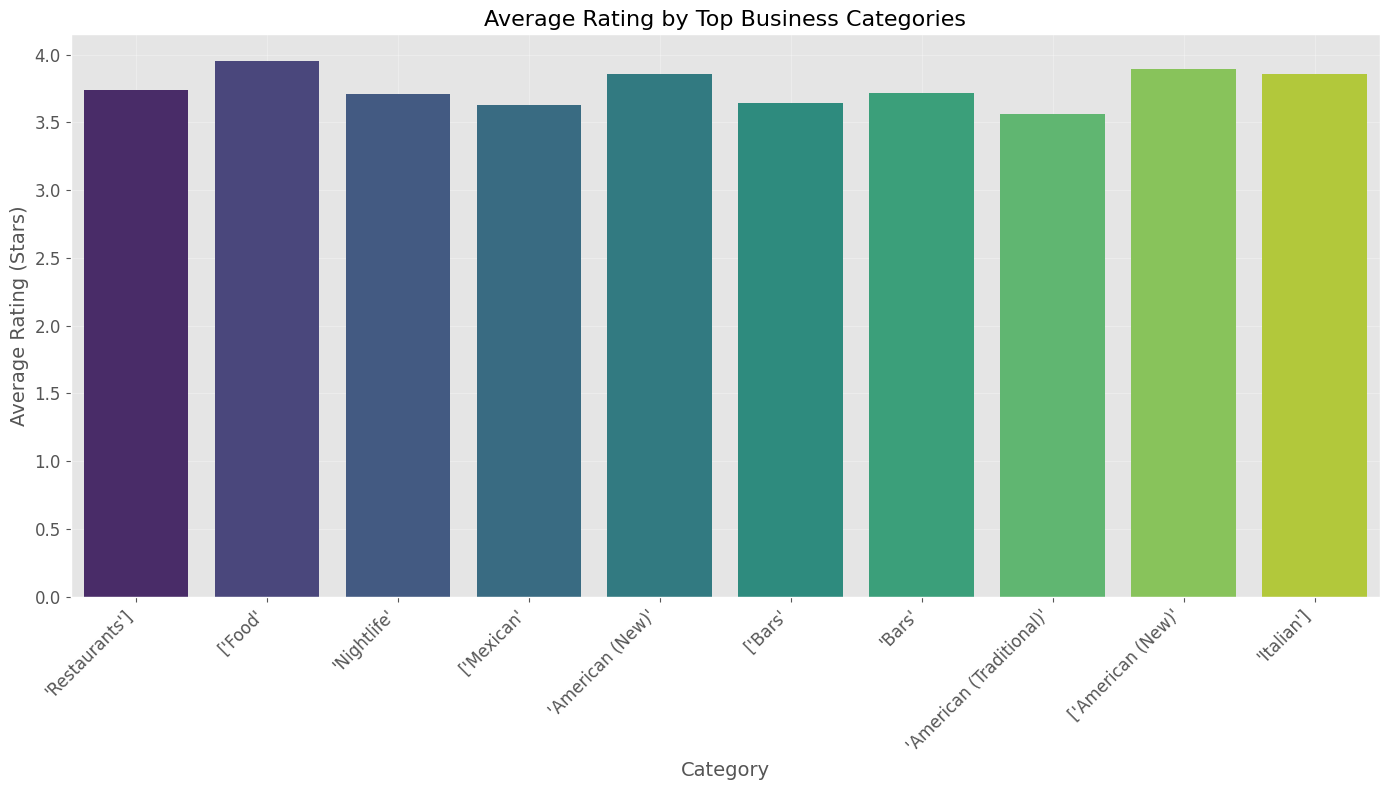

In [30]:
import re

# Ratings by category
if 'categories' in merged_df.columns and 'stars_review' in merged_df.columns:
    all_categories = []
    for categories in merged_df['categories'].dropna():
        if categories:
            all_categories.extend([c.strip() for c in categories.split(',')])
    
    category_counts = pd.Series(all_categories).value_counts()
    top_categories = category_counts.head(10).index.tolist()
    
    category_ratings = []
    for category in top_categories:
        # Escape special characters in the category name
        category_reviews = merged_df[merged_df['categories'].str.contains(re.escape(category), na=False)]
        if not category_reviews.empty:
            avg_rating = category_reviews['stars_review'].mean()
            category_ratings.append({'Category': category, 'Average Rating': avg_rating, 'Review Count': len(category_reviews)})
    
    category_ratings_df = pd.DataFrame(category_ratings)
    
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Category', y='Average Rating', data=category_ratings_df, palette='viridis')
    plt.title('Average Rating by Top Business Categories', fontsize=16)
    plt.xlabel('Category', fontsize=14)
    plt.ylabel('Average Rating (Stars)', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Required columns ('categories' or 'stars_review') are missing.")

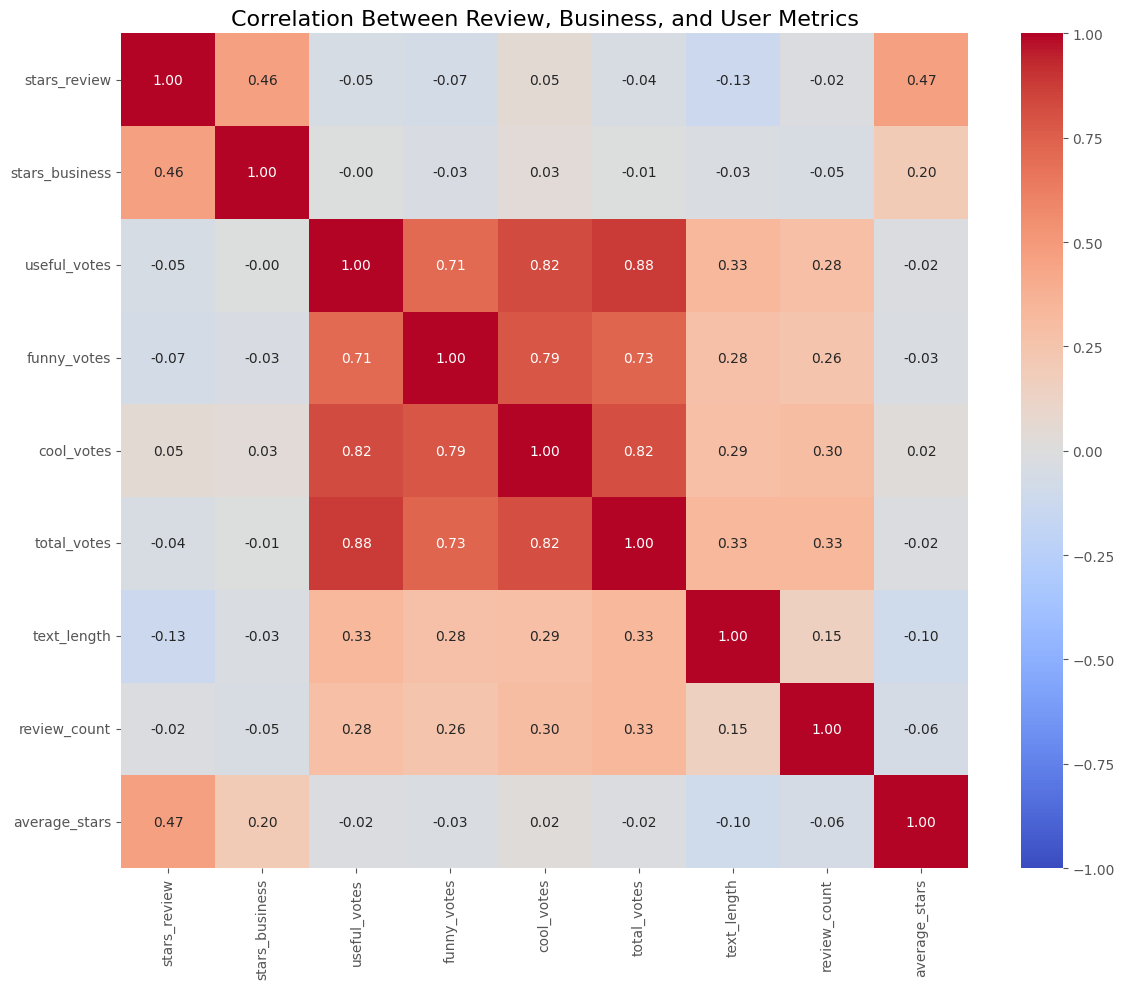

In [32]:
# Correlation matrix
corr_cols = ['stars_review', 'stars_business', 'useful_votes', 'funny_votes', 'cool_votes', 'total_votes', 'text_length', 'review_count', 'average_stars']
corr_cols = [col for col in corr_cols if col in merged_df.columns]

if len(corr_cols) > 1:
    corr_matrix = merged_df[corr_cols].corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
    plt.title('Correlation Between Review, Business, and User Metrics', fontsize=16)
    plt.tight_layout()
    plt.show()


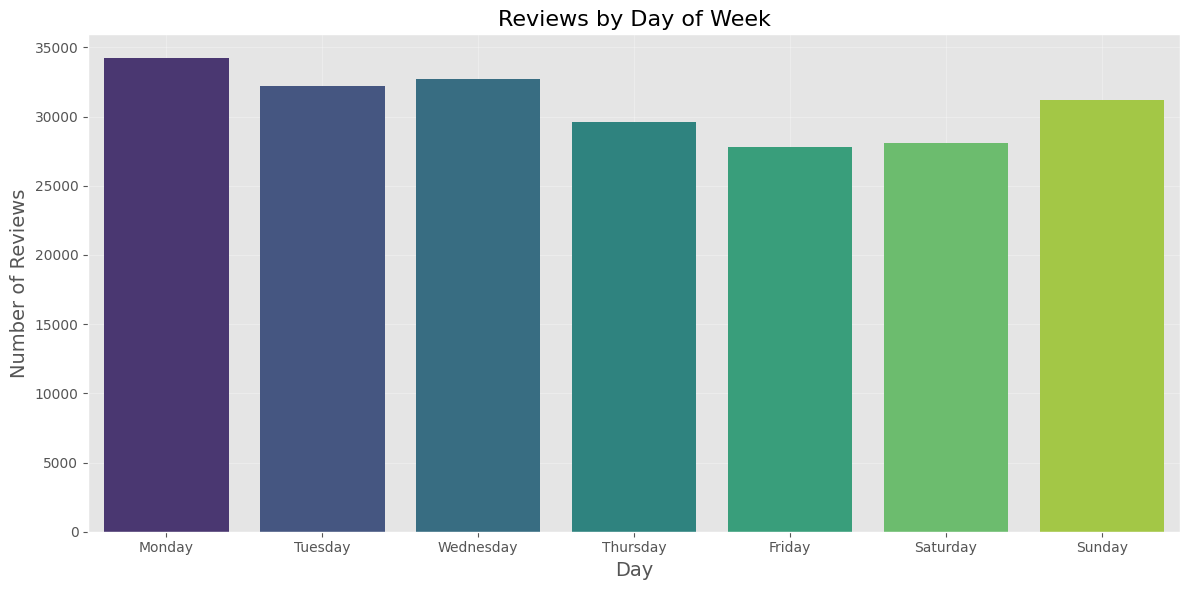

In [33]:
# Reviews per day of week
if 'date' in merged_df.columns:
    merged_df['dayofweek'] = merged_df['date'].dt.dayofweek
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    merged_df['day_name'] = merged_df['dayofweek'].apply(lambda x: day_names[x])
    
    plt.figure(figsize=(12, 6))
    sns.countplot(x='day_name', data=merged_df, order=day_names, palette='viridis')
    plt.title('Reviews by Day of Week', fontsize=16)
    plt.xlabel('Day', fontsize=14)
    plt.ylabel('Number of Reviews', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


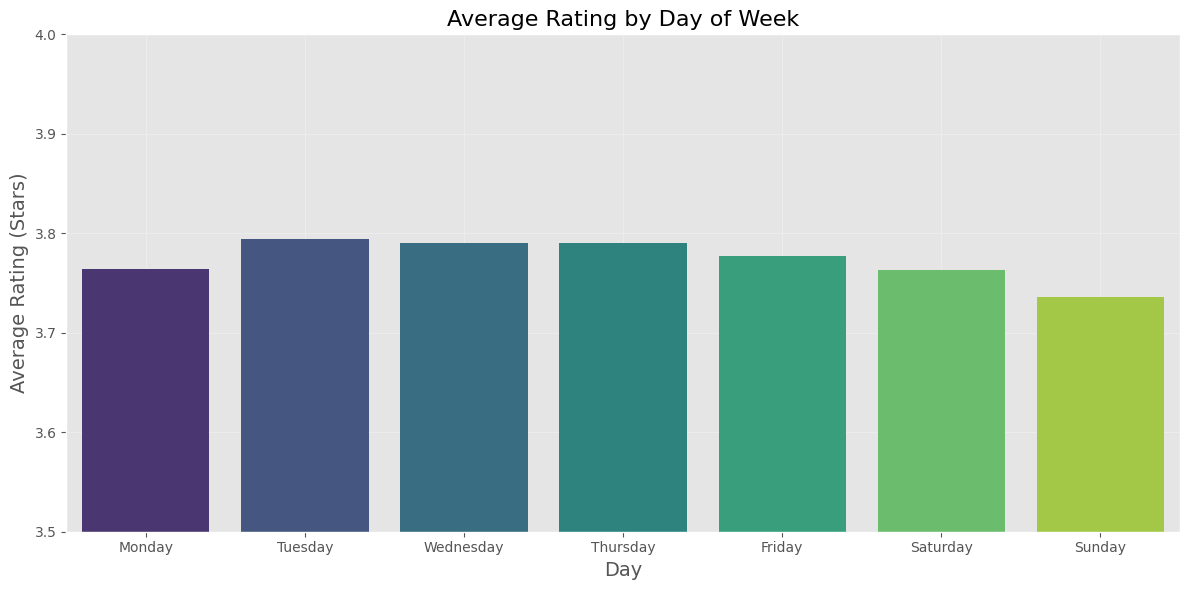

In [34]:
# Average rating by day of week
if 'date' in merged_df.columns and 'day_name' in merged_df.columns:
    avg_rating_by_day = merged_df.groupby('day_name')['stars_review'].mean().reindex(day_names)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=avg_rating_by_day.index, y=avg_rating_by_day.values, palette='viridis')
    plt.title('Average Rating by Day of Week', fontsize=16)
    plt.xlabel('Day', fontsize=14)
    plt.ylabel('Average Rating (Stars)', fontsize=14)
    plt.ylim(3.5, 4.0)  # Adjust as needed to show differences
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


count    215879.000000
mean          0.983870
std           1.122119
min          -0.795331
25%          -0.212180
50%           1.484260
75%           2.040905
max           2.040905
Name: review_count, dtype: float64
user_activity
2-5 Reviews    117538
<= 1 Review     98341
Name: count, dtype: int64


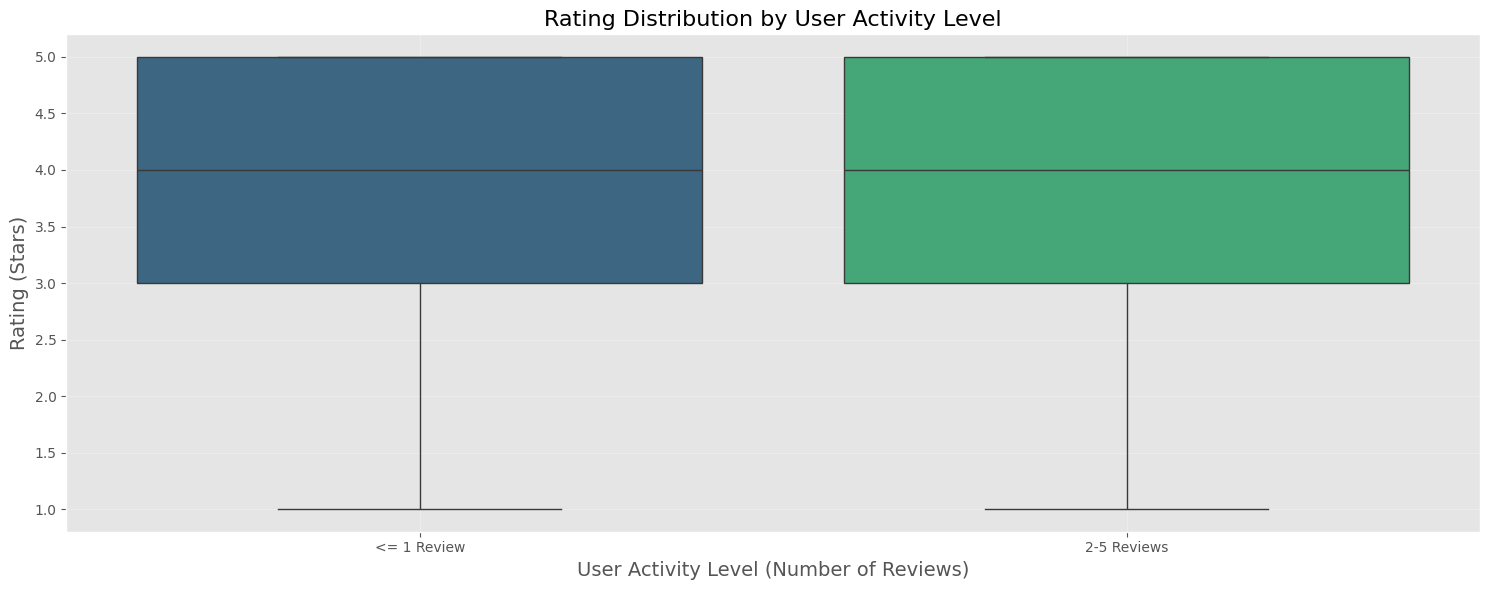

In [47]:
# Analyze the distribution of review_count
print(merged_df['review_count'].describe())

# Dynamically define bins based on the range of review_count
max_review_count = merged_df['review_count'].max()
bins = [-1, 1, 5, 10, 20, 50, 100]  # Initial bin boundaries

# Remove bins that exceed the maximum value
bins = [b for b in bins if b <= max_review_count] + [max_review_count + 1]

# Define labels for the bins
labels = ['<= 1 Review', '2-5 Reviews', '6-10 Reviews', '11-20 Reviews', '21-50 Reviews', '51-100 Reviews', '101+ Reviews']
labels = labels[:len(bins) - 1]  # Adjust labels to match the number of bins

# Create user activity level categories
merged_df['user_activity'] = pd.cut(
    merged_df['review_count'], 
    bins=bins,
    labels=labels
)

# Drop rows with missing ratings
merged_df = merged_df.dropna(subset=['stars_review'])

# Check if all bins have data
print(merged_df['user_activity'].value_counts())

# Plot the box plot
plt.figure(figsize=(15, 6))
sns.boxplot(x='user_activity', y='stars_review', data=merged_df, palette='viridis')
plt.title('Rating Distribution by User Activity Level', fontsize=16)
plt.xlabel('User Activity Level (Number of Reviews)', fontsize=14)
plt.ylabel('Rating (Stars)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

count    215879.000000
mean          0.983870
std           1.122119
min          -0.795331
25%          -0.212180
50%           1.484260
75%           2.040905
max           2.040905
Name: review_count, dtype: float64
user_activity
2-5 Reviews    117538
<= 1 Review     98341
Name: count, dtype: int64


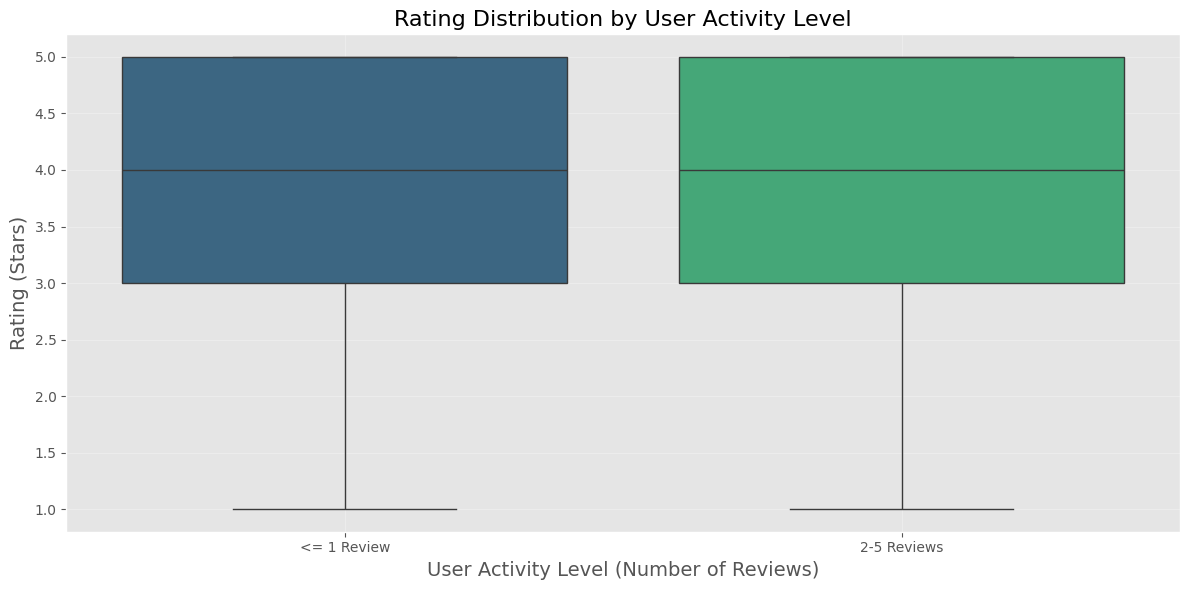

In [49]:
# Analyze the distribution of review_count
print(merged_df['review_count'].describe())

# Dynamically define bins based on the range of review_count
max_review_count = merged_df['review_count'].max()
bins = [-1, 1, 5, 10, 20, 50, 100]  # Initial bin boundaries

# Remove bins that exceed the maximum value
bins = [b for b in bins if b <= max_review_count] + [max_review_count + 1]

# Define labels for the bins
labels = ['<= 1 Review', '2-5 Reviews', '6-10 Reviews', '11-20 Reviews', '21-50 Reviews', '51-100 Reviews', '101+ Reviews']
labels = labels[:len(bins) - 1]  # Adjust labels to match the number of bins

# Create user activity level categories
merged_df['user_activity'] = pd.cut(
    merged_df['review_count'], 
    bins=bins,
    labels=labels
)

# Drop rows with missing ratings
merged_df = merged_df.dropna(subset=['stars_review'])

# Check if all bins have data
print(merged_df['user_activity'].value_counts())

# Plot the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='user_activity', y='stars_review', data=merged_df, palette='viridis')
plt.title('Rating Distribution by User Activity Level', fontsize=16)
plt.xlabel('User Activity Level (Number of Reviews)', fontsize=14)
plt.ylabel('Rating (Stars)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

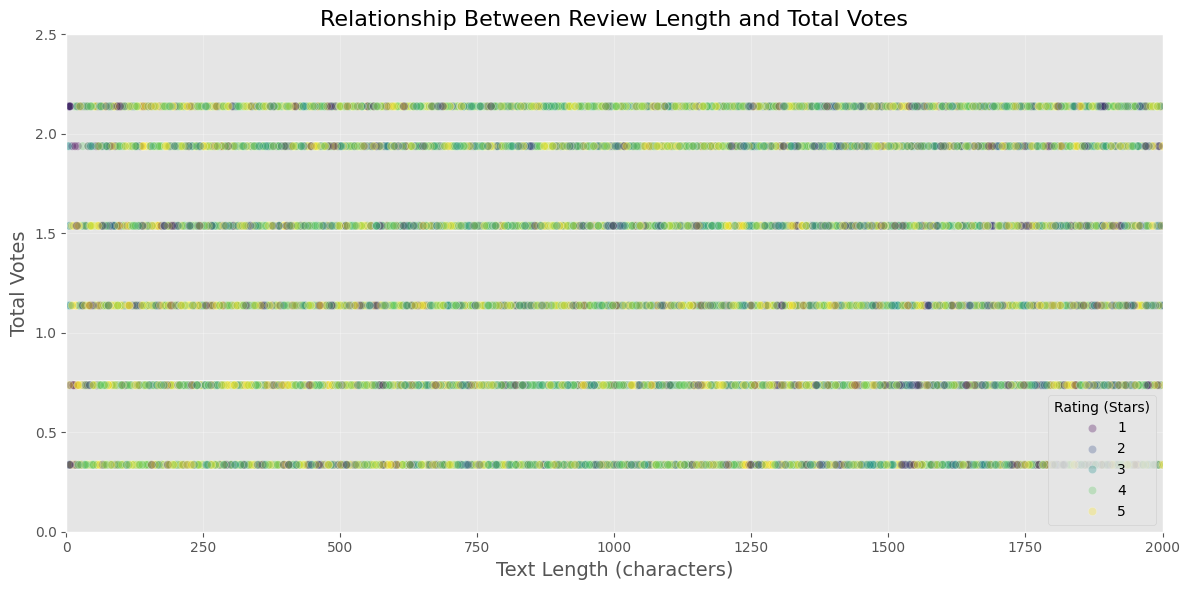

In [52]:
# Text length vs. votes
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df, x='text_length', y='total_votes', alpha=0.3, hue='stars_review', palette='viridis')
plt.title('Relationship Between Review Length and Total Votes', fontsize=16)
plt.xlabel('Text Length (characters)', fontsize=14)
plt.ylabel('Total Votes', fontsize=14)
plt.xlim(0, 2000)
plt.ylim(0, 2.5)  # Adjust as needed
plt.legend(title='Rating (Stars)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


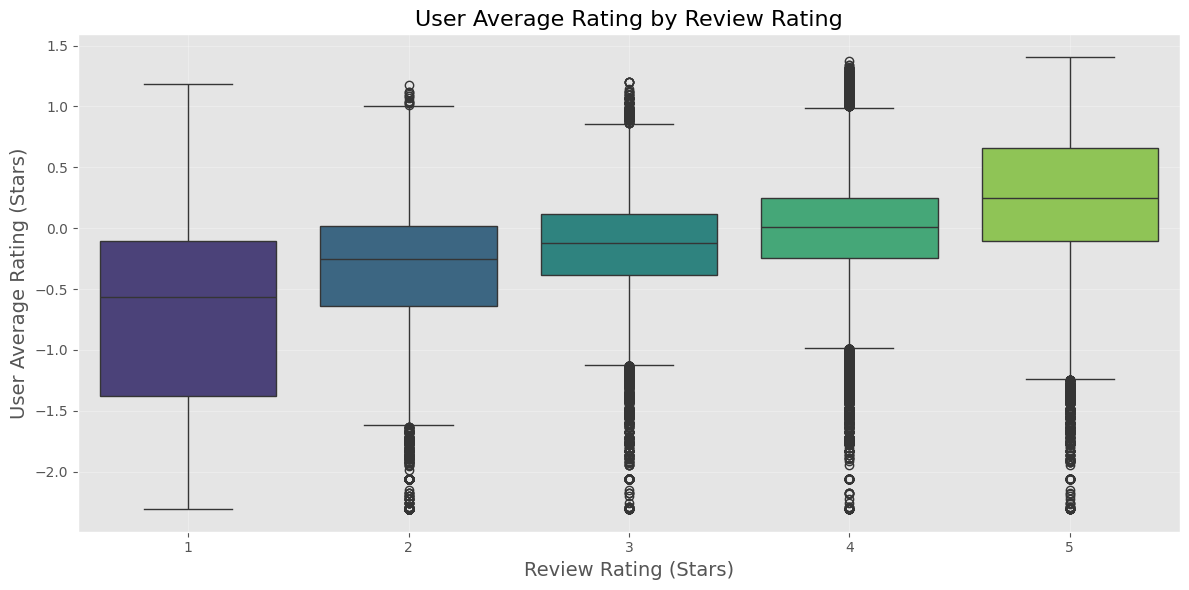

In [53]:
# User average rating vs. review rating
plt.figure(figsize=(12, 6))
sns.boxplot(x='stars_review', y='average_stars', data=merged_df, palette='viridis')
plt.title('User Average Rating by Review Rating', fontsize=16)
plt.xlabel('Review Rating (Stars)', fontsize=14)
plt.ylabel('User Average Rating (Stars)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


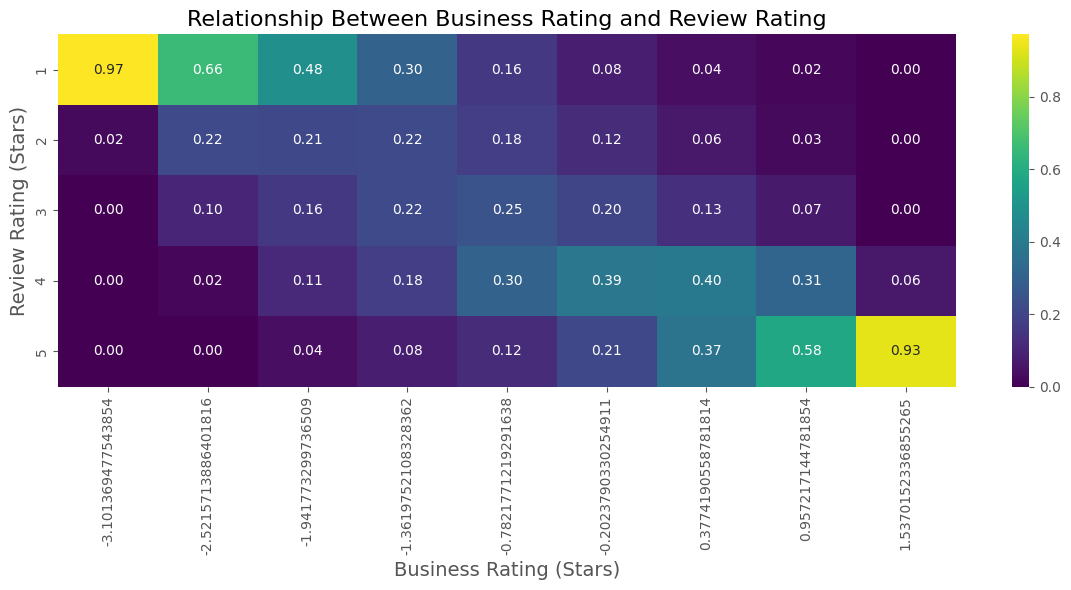

In [54]:
# Business rating vs. review rating
plt.figure(figsize=(12, 6))
sns.heatmap(
    pd.crosstab(merged_df['stars_review'], merged_df['stars_business'], normalize='columns'),
    annot=True, 
    cmap='viridis', 
    fmt='.2f'
)
plt.title('Relationship Between Business Rating and Review Rating', fontsize=16)
plt.xlabel('Business Rating (Stars)', fontsize=14)
plt.ylabel('Review Rating (Stars)', fontsize=14)
plt.tight_layout()
plt.show()


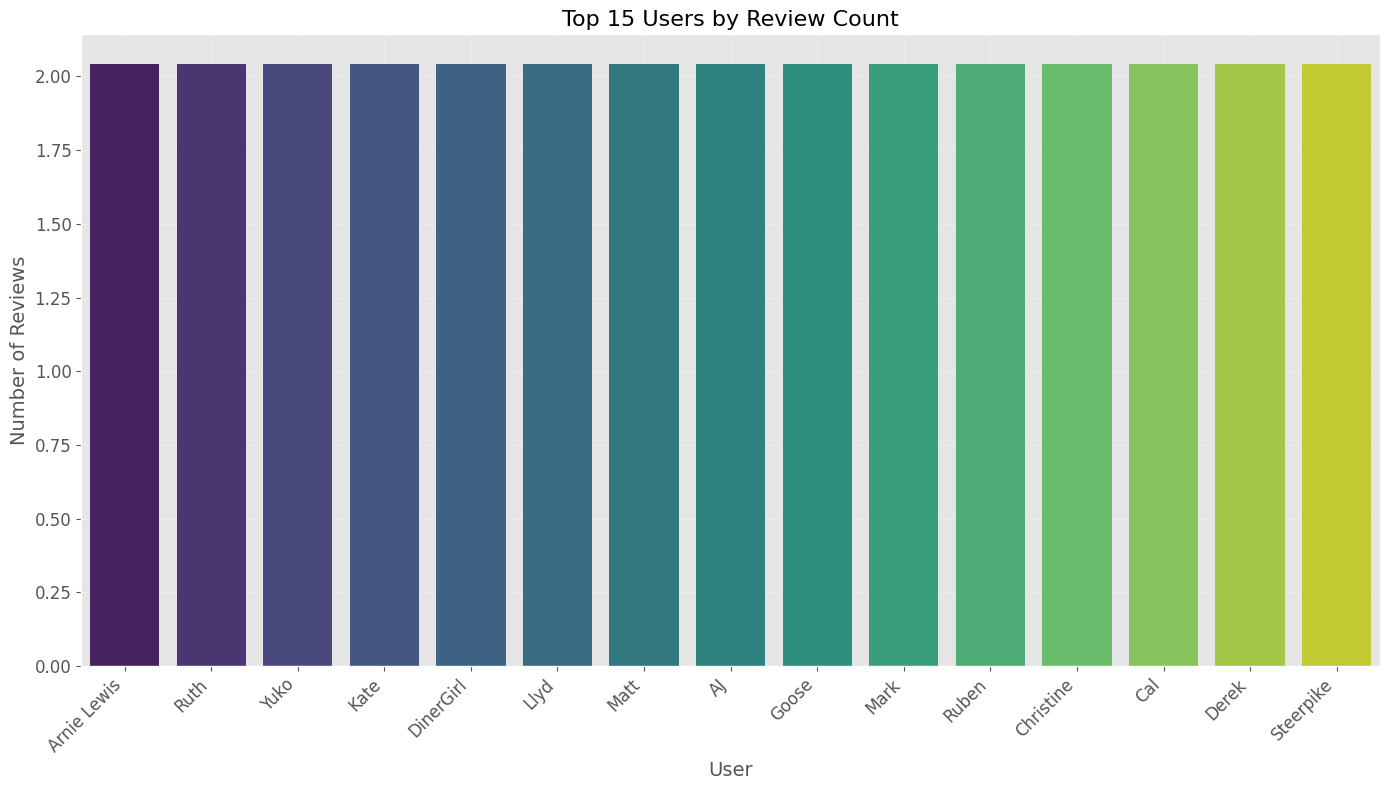

In [55]:
# Top users by review count
top_users = cleaned_users_df.sort_values('review_count', ascending=False).head(15)

plt.figure(figsize=(14, 8))
sns.barplot(x='name', y='review_count', data=top_users, palette='viridis')
plt.title('Top 15 Users by Review Count', fontsize=16)
plt.xlabel('User', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


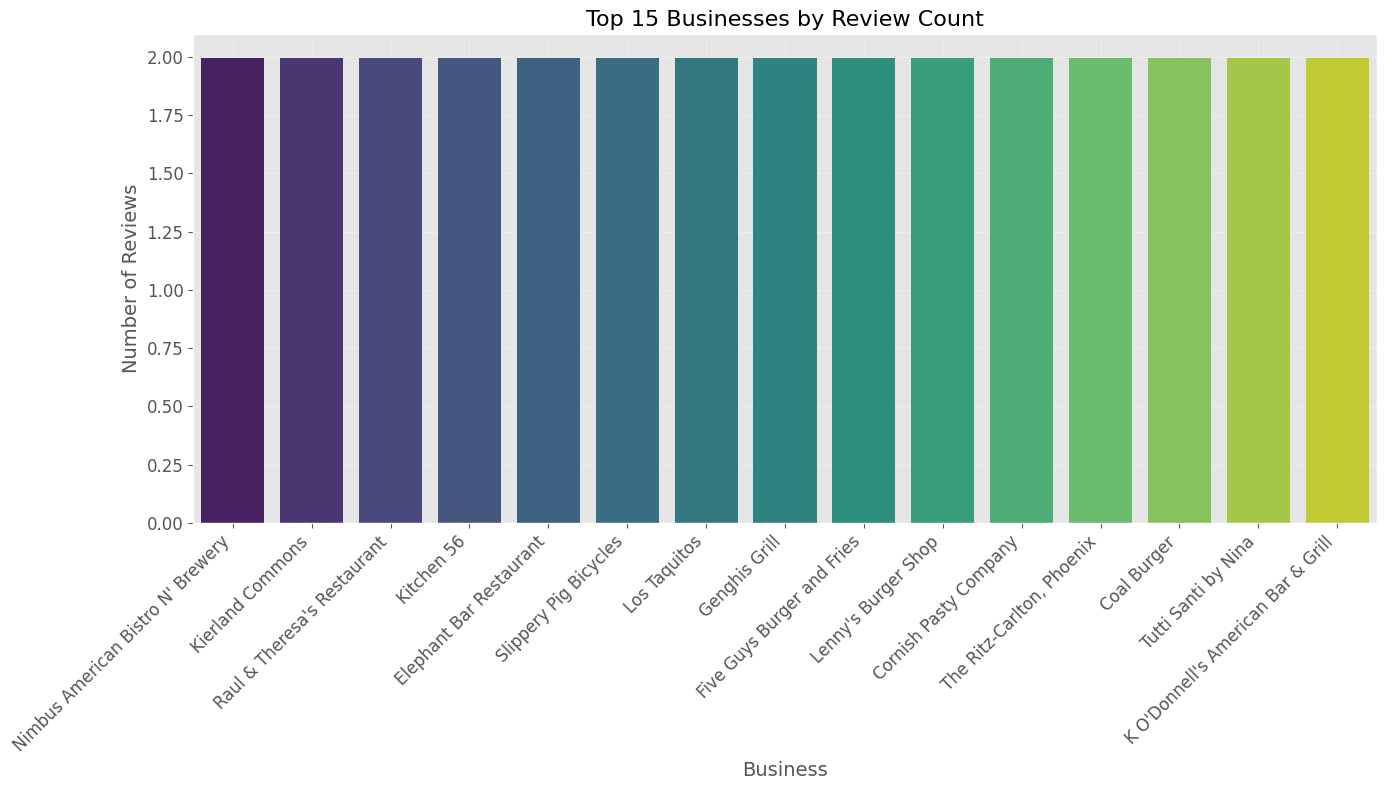

In [56]:
# Top businesses by review count
top_businesses = cleaned_business_df.sort_values('review_count', ascending=False).head(15)

plt.figure(figsize=(14, 8))
sns.barplot(x='name', y='review_count', data=top_businesses, palette='viridis')
plt.title('Top 15 Businesses by Review Count', fontsize=16)
plt.xlabel('Business', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
